In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'compiled data with CI.csv',
 'compiled Lplasmid pcr eff.ipynb',
 'compiled plasmid.ipynb',
 'compiledPlots for lin plasmid Standards for amps 1 to 10.png',
 'Lplasmid compiled stds.csv',
 'Lplasmid compiled stds.xlsx']

In [3]:
df = pd.read_csv('Lplasmid compiled stds.csv')

In [4]:
df

,Run,Amp,Conc (fg/ul),CT
0,1,2,1000000.0,8.770
1,1,2,1000000.0,8.830
2,1,2,100000.0,12.457
3,1,2,100000.0,12.572
4,1,2,10000.0,15.717
...,...,...,...,...
612,11,10,10.0,26.365
613,11,10,1.0,29.063
614,11,10,1.0,28.753
615,11,10,0.0,Undetermined


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           617 non-null    int64  
 1   Amp           617 non-null    int64  
 2   Conc (fg/ul)  617 non-null    float64
 3   CT            617 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 19.4+ KB


In [6]:
df = df[df['Conc (fg/ul)'] != 0]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 614
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           522 non-null    int64  
 1   Amp           522 non-null    int64  
 2   Conc (fg/ul)  522 non-null    float64
 3   CT            522 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 20.4+ KB


In [8]:
# removing results whose CT values are 'Undertermined' and 0
df = df[(df['CT']!='Undetermined') & (df['CT']!=0)]

In [9]:
df[(df['CT']=='Undetermined') | (df['CT']==0)]

,Run,Amp,Conc (fg/ul),CT


In [10]:
df['CT'] = df['CT'].astype(float)

In [11]:
df = df[(df['CT']!='Undetermined') & (df['CT']!=0)]

In [12]:
df[(df['CT']=='Undetermined') | (df['CT']==0)]

,Run,Amp,Conc (fg/ul),CT


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 614
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           510 non-null    int64  
 1   Amp           510 non-null    int64  
 2   Conc (fg/ul)  510 non-null    float64
 3   CT            510 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 19.9 KB


In [14]:
# converting fg/ul to pg/ul
df['Conc (pg/ul)'] = df['Conc (fg/ul)']/1000

In [15]:
# log10 conc pg/ul
df['Quantity'] = np.log10(df['Conc (pg/ul)'])

In [16]:
df.head(10)

,Run,Amp,Conc (fg/ul),CT,Conc (pg/ul),Quantity
0,1,2,1000000.0,8.770,1000.0,3.0
1,1,2,1000000.0,8.830,1000.0,3.0
2,1,2,100000.0,12.457,100.0,2.0
3,1,2,100000.0,12.572,100.0,2.0
4,1,2,10000.0,15.717,10.0,1.0
5,1,2,10000.0,15.664,10.0,1.0
6,1,2,1000.0,18.950,1.0,0.0
7,1,2,1000.0,18.975,1.0,0.0
8,1,2,100.0,22.889,0.1,-1.0
9,1,2,100.0,22.831,0.1,-1.0


In [17]:
df = df.sort_values(by=['Amp','Quantity'],ascending=True)

In [18]:
df_grp = df.groupby(by=['Amp','Quantity']).agg({'CT':['mean','std','count']},)

In [19]:
df_grp.round(decimals=3)

CT             
                mean    std count
Amp Quantity                     
1   -4.0      38.422  0.012     2
    -3.0      37.482  1.290     2
    -2.0      36.001  1.004     6
    -1.0      32.092  0.991     8
     0.0      28.901  1.191    11
...              ...    ...   ...
10  -1.0      22.936  0.828    14
     0.0      19.696  0.734    12
     1.0      16.649  1.090    14
     2.0      12.706  0.705    14
     3.0       8.541  0.308     3

[69 rows x 3 columns]

In [20]:
df_grp

CT                
                   mean       std count
Amp Quantity                           
1   -4.0      38.422500  0.012021     2
    -3.0      37.482000  1.289763     2
    -2.0      36.001333  1.003611     6
    -1.0      32.091625  0.991499     8
     0.0      28.901182  1.191135    11
...                 ...       ...   ...
10  -1.0      22.936286  0.827980    14
     0.0      19.696500  0.734493    12
     1.0      16.649000  1.089855    14
     2.0      12.705571  0.704633    14
     3.0       8.541000  0.308122     3

[69 rows x 3 columns]

In [21]:
df_grp.index.get_level_values(0)

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
             3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
             5,  5,  5,  5,  5,  5,  5,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
             8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
            10],
           dtype='int64', name='Amp')

In [22]:
df_grp.index.get_level_values(1)

Float64Index([-4.0, -3.0, -2.0, -1.0,  0.0,  1.0,  2.0,  3.0, -5.0, -4.0, -3.0,
              -2.0, -1.0,  0.0,  1.0,  2.0,  3.0, -1.0,  0.0,  1.0,  2.0,  3.0,
              -6.0, -5.0, -4.0, -3.0, -2.0, -1.0,  0.0,  1.0,  2.0,  3.0, -5.0,
              -4.0, -3.0, -2.0, -1.0,  0.0,  1.0,  2.0,  3.0, -5.0, -4.0, -3.0,
              -2.0, -1.0,  0.0,  1.0,  2.0,  3.0, -1.0,  0.0,  1.0,  2.0,  3.0,
              -1.0,  0.0,  1.0,  2.0,  3.0, -5.0, -4.0, -3.0, -2.0, -1.0,  0.0,
               1.0,  2.0,  3.0],
             dtype='float64', name='Quantity')

In [23]:
amps = df_grp.index.get_level_values(0).unique()

In [24]:
dict_amp = {}
for amp in amps:
    print('Amplicon ' + str(amp))
    dict_amp['Amp'+str(amp)] = df_grp.loc[df_grp.index.get_level_values(0) == amp]
    print(dict_amp['Amp'+str(amp)])

Amplicon 1
                     CT                
                   mean       std count
Amp Quantity                           
1   -4.0      38.422500  0.012021     2
    -3.0      37.482000  1.289763     2
    -2.0      36.001333  1.003611     6
    -1.0      32.091625  0.991499     8
     0.0      28.901182  1.191135    11
     1.0      25.308625  1.019998     8
     2.0      21.753727  1.206160    11
     3.0      17.650667  0.332626     3
Amplicon 2
                     CT                
                   mean       std count
Amp Quantity                           
2   -5.0      35.191000  1.051262     4
    -4.0      32.121500  0.235833     4
    -3.0      28.619750  0.025786     4
    -2.0      27.162500  1.057735    12
    -1.0      23.634929  1.225351    14
     0.0      20.213471  1.160690    17
     1.0      16.835714  1.232722    14
     2.0      13.077235  1.069243    17
     3.0       8.585333  0.373022     3
Amplicon 3
                   CT                
         

In [25]:
dict_amp['Amp1']

CT                
                   mean       std count
Amp Quantity                           
1   -4.0      38.422500  0.012021     2
    -3.0      37.482000  1.289763     2
    -2.0      36.001333  1.003611     6
    -1.0      32.091625  0.991499     8
     0.0      28.901182  1.191135    11
     1.0      25.308625  1.019998     8
     2.0      21.753727  1.206160    11
     3.0      17.650667  0.332626     3

In [26]:
df['Quantity'].unique()

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3., -5., -6.])

In [27]:
df

,Run,Amp,Conc (fg/ul),CT,Conc (pg/ul),Quantity
270,4,1,0.1,38.431,0.0001,-4.0
271,4,1,0.1,38.414,0.0001,-4.0
266,4,1,1.0,36.570,0.0010,-3.0
268,5,1,1.0,38.394,0.0010,-3.0
259,5,1,10.0,35.767,0.0100,-2.0
...,...,...,...,...,...,...
605,11,10,100000.0,12.293,100.0000,2.0
606,11,10,100000.0,12.211,100.0000,2.0
96,2,10,1000000.0,8.483,1000.0000,3.0
97,2,10,1000000.0,8.874,1000.0000,3.0


<AxesSubplot:xlabel='Quantity', ylabel='CT'>

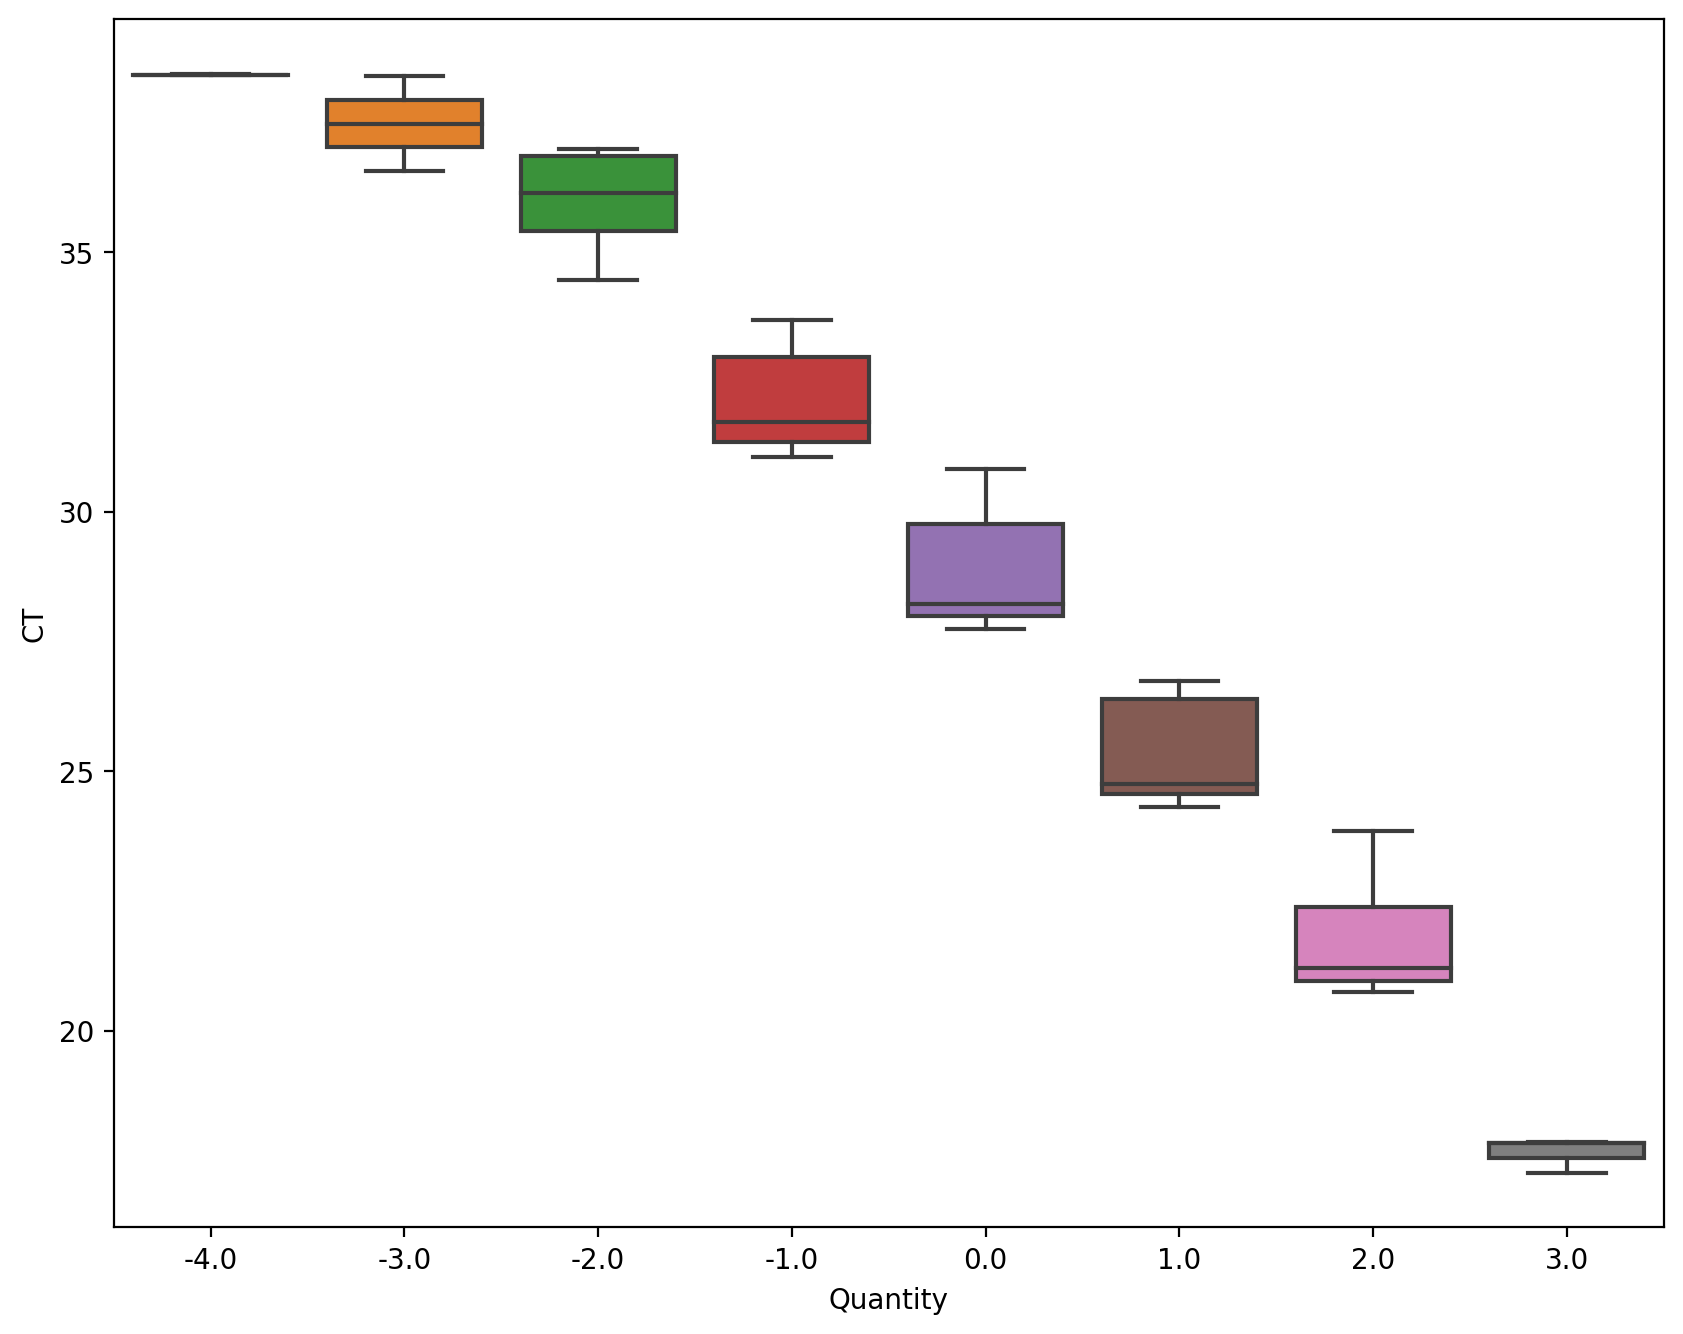

In [28]:
plt.figure(figsize=(10,8),dpi=200)
sns.boxplot(data=df[df['Amp']==1],
           x='Quantity',
           y='CT',
            #hue=df['Quantity']
            #ax=ax # defining the axes of the plot to the ax value that we zipped
          )
#plt.legend(bbox_to_anchor=(1.1, 1))

In [29]:
len(df['Amp'].unique())

9

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


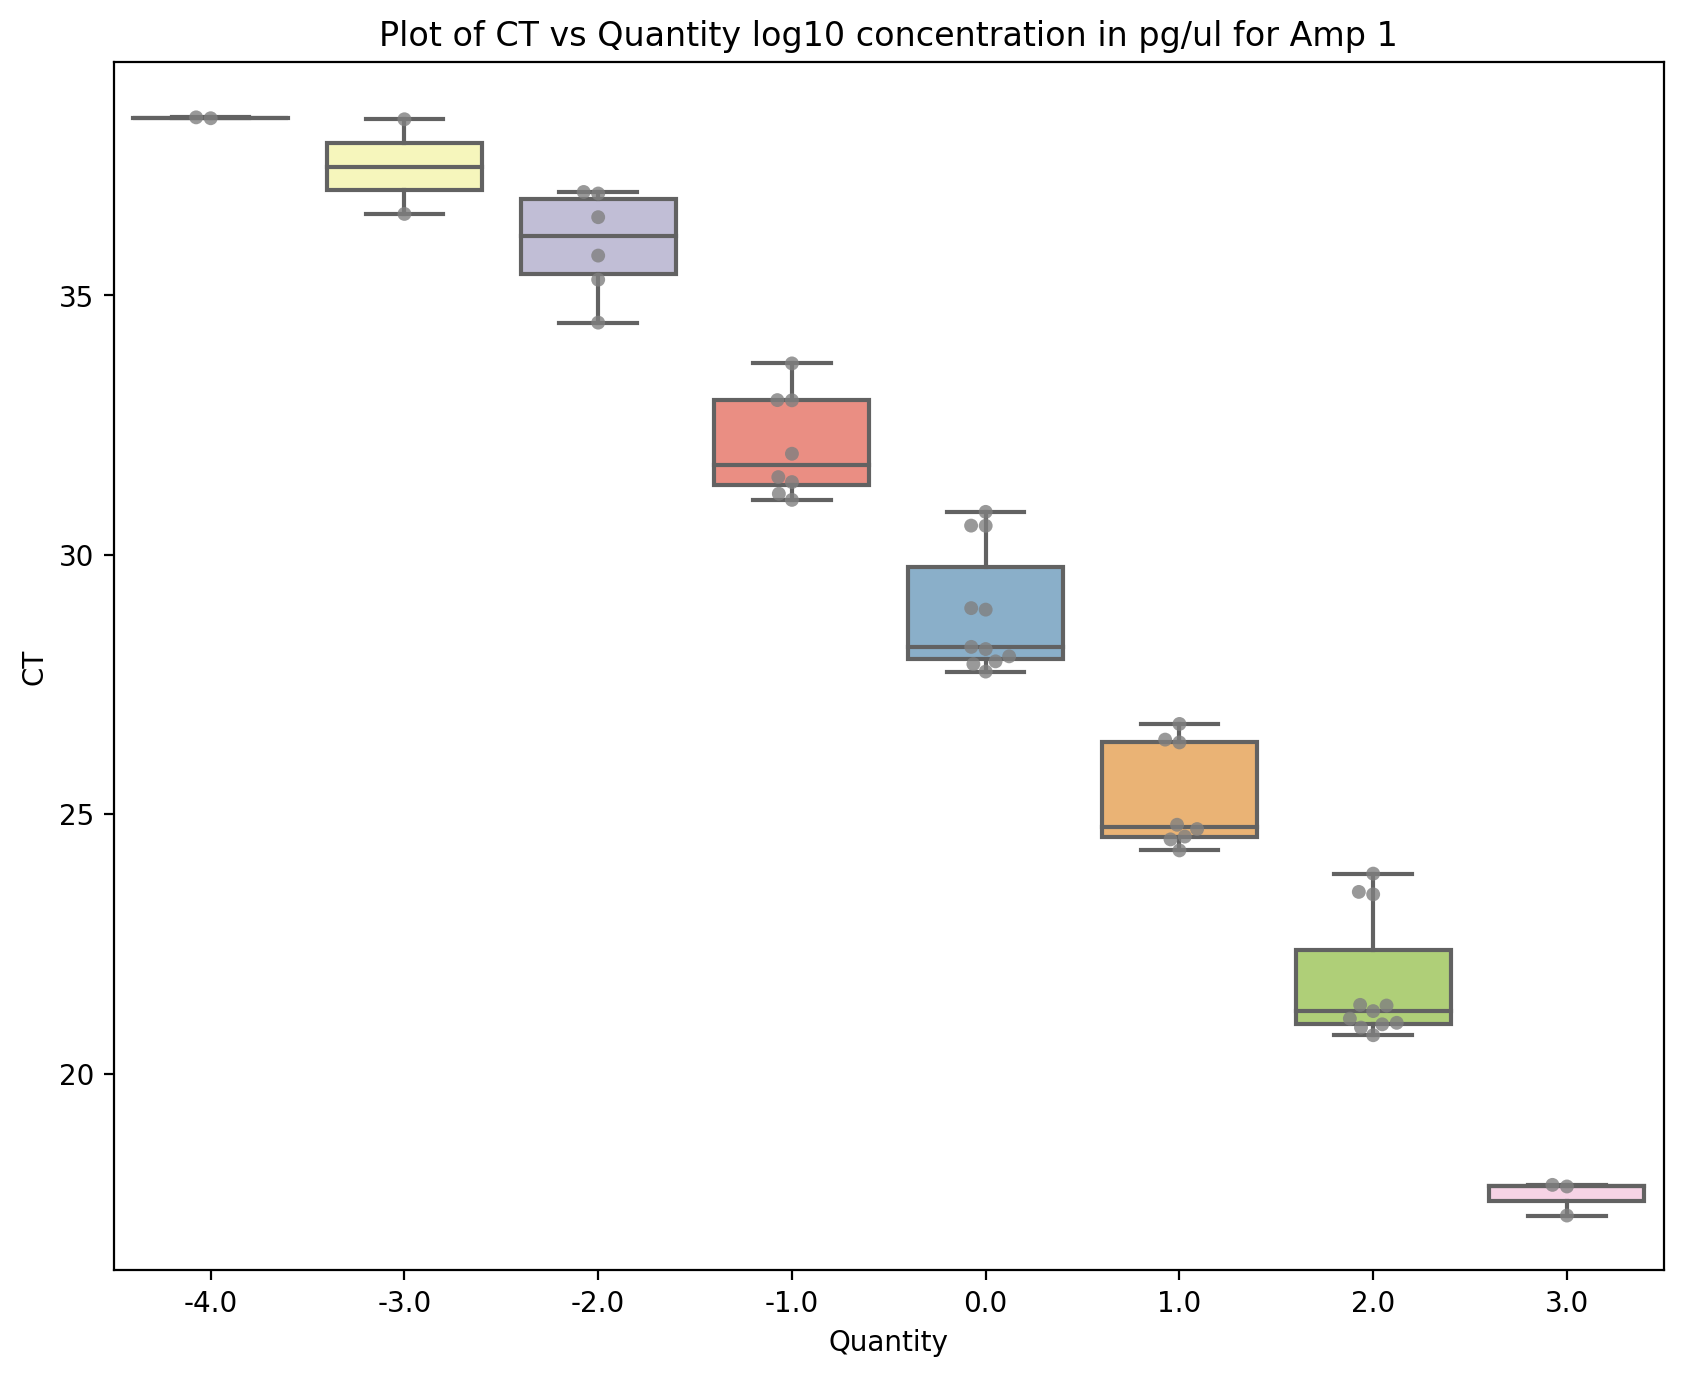

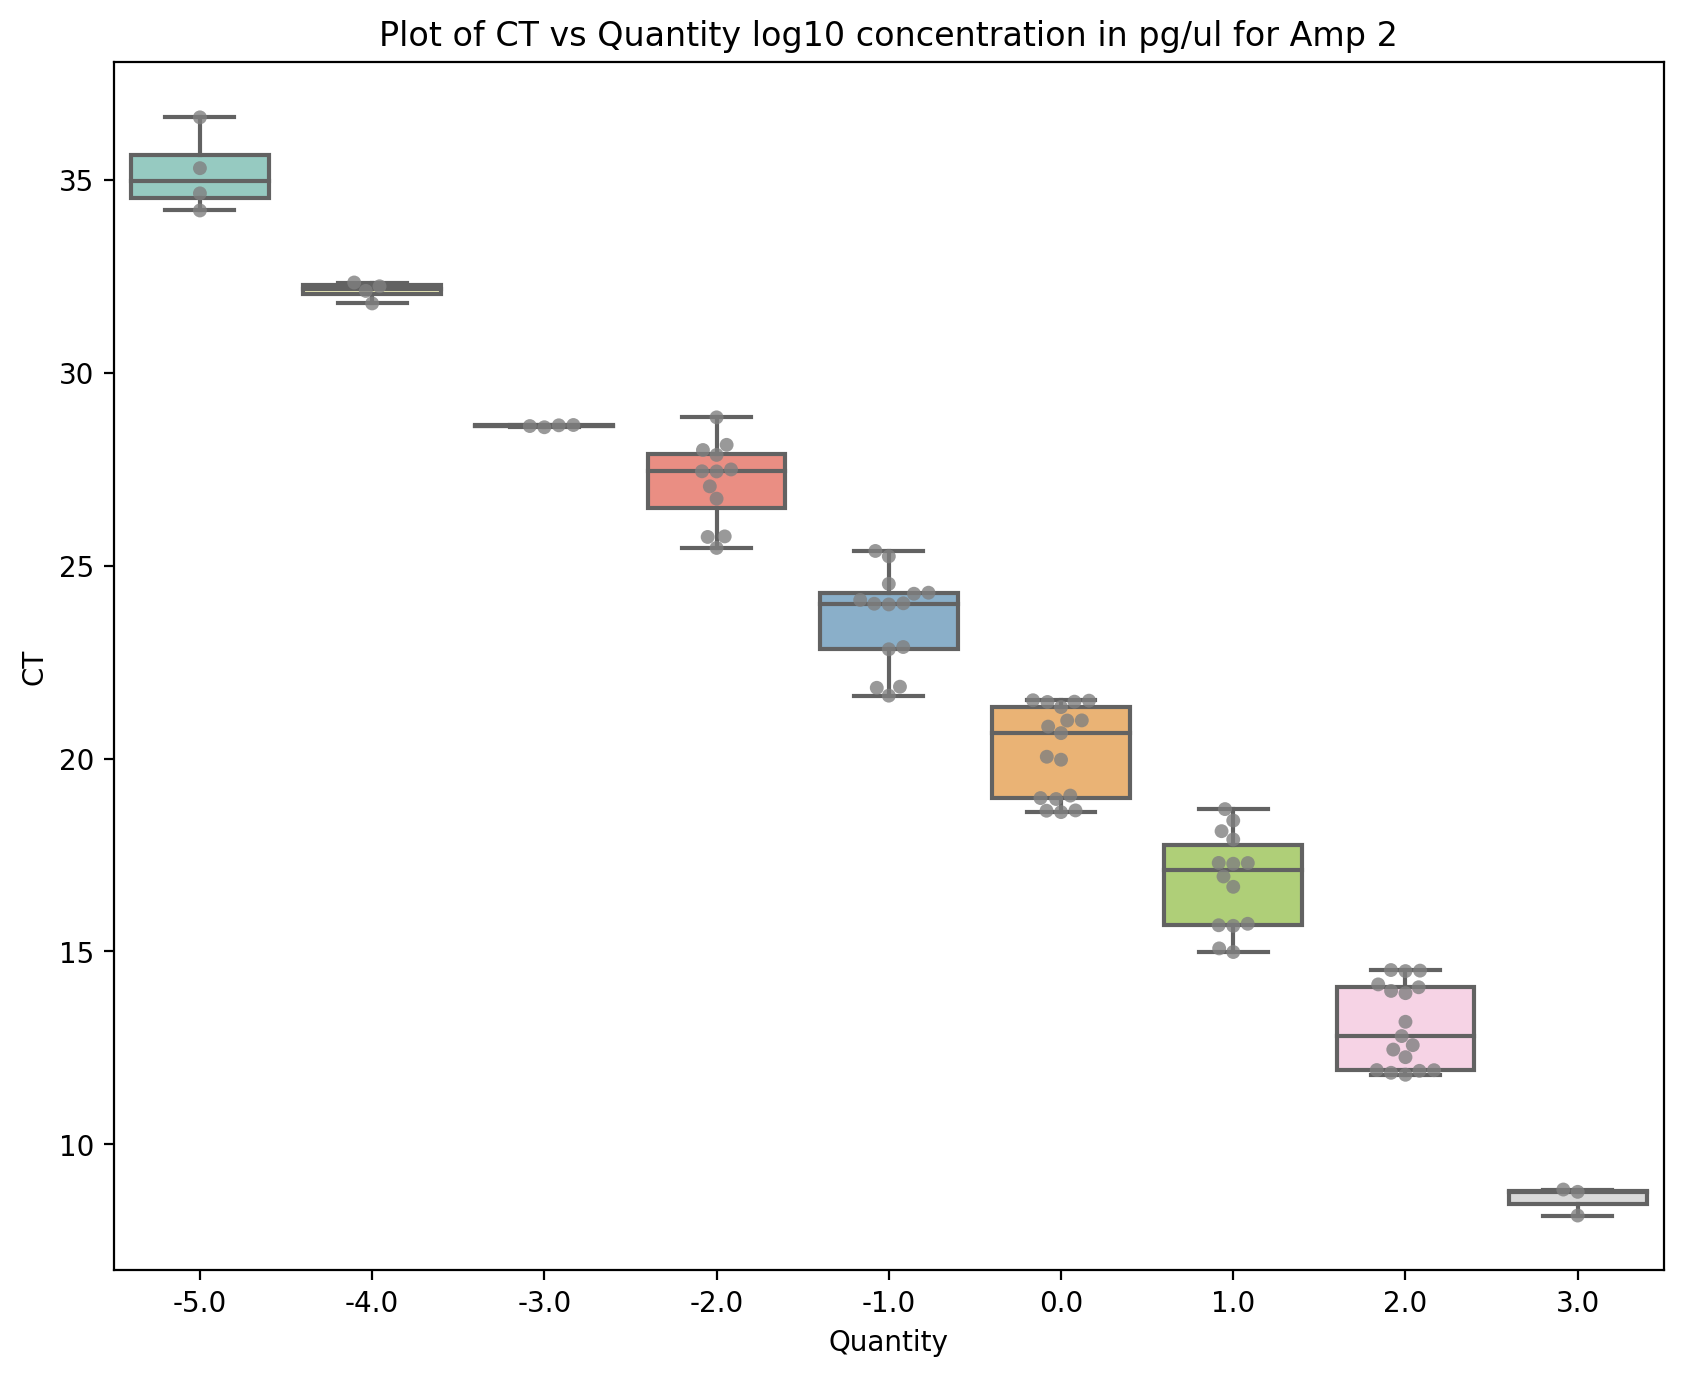

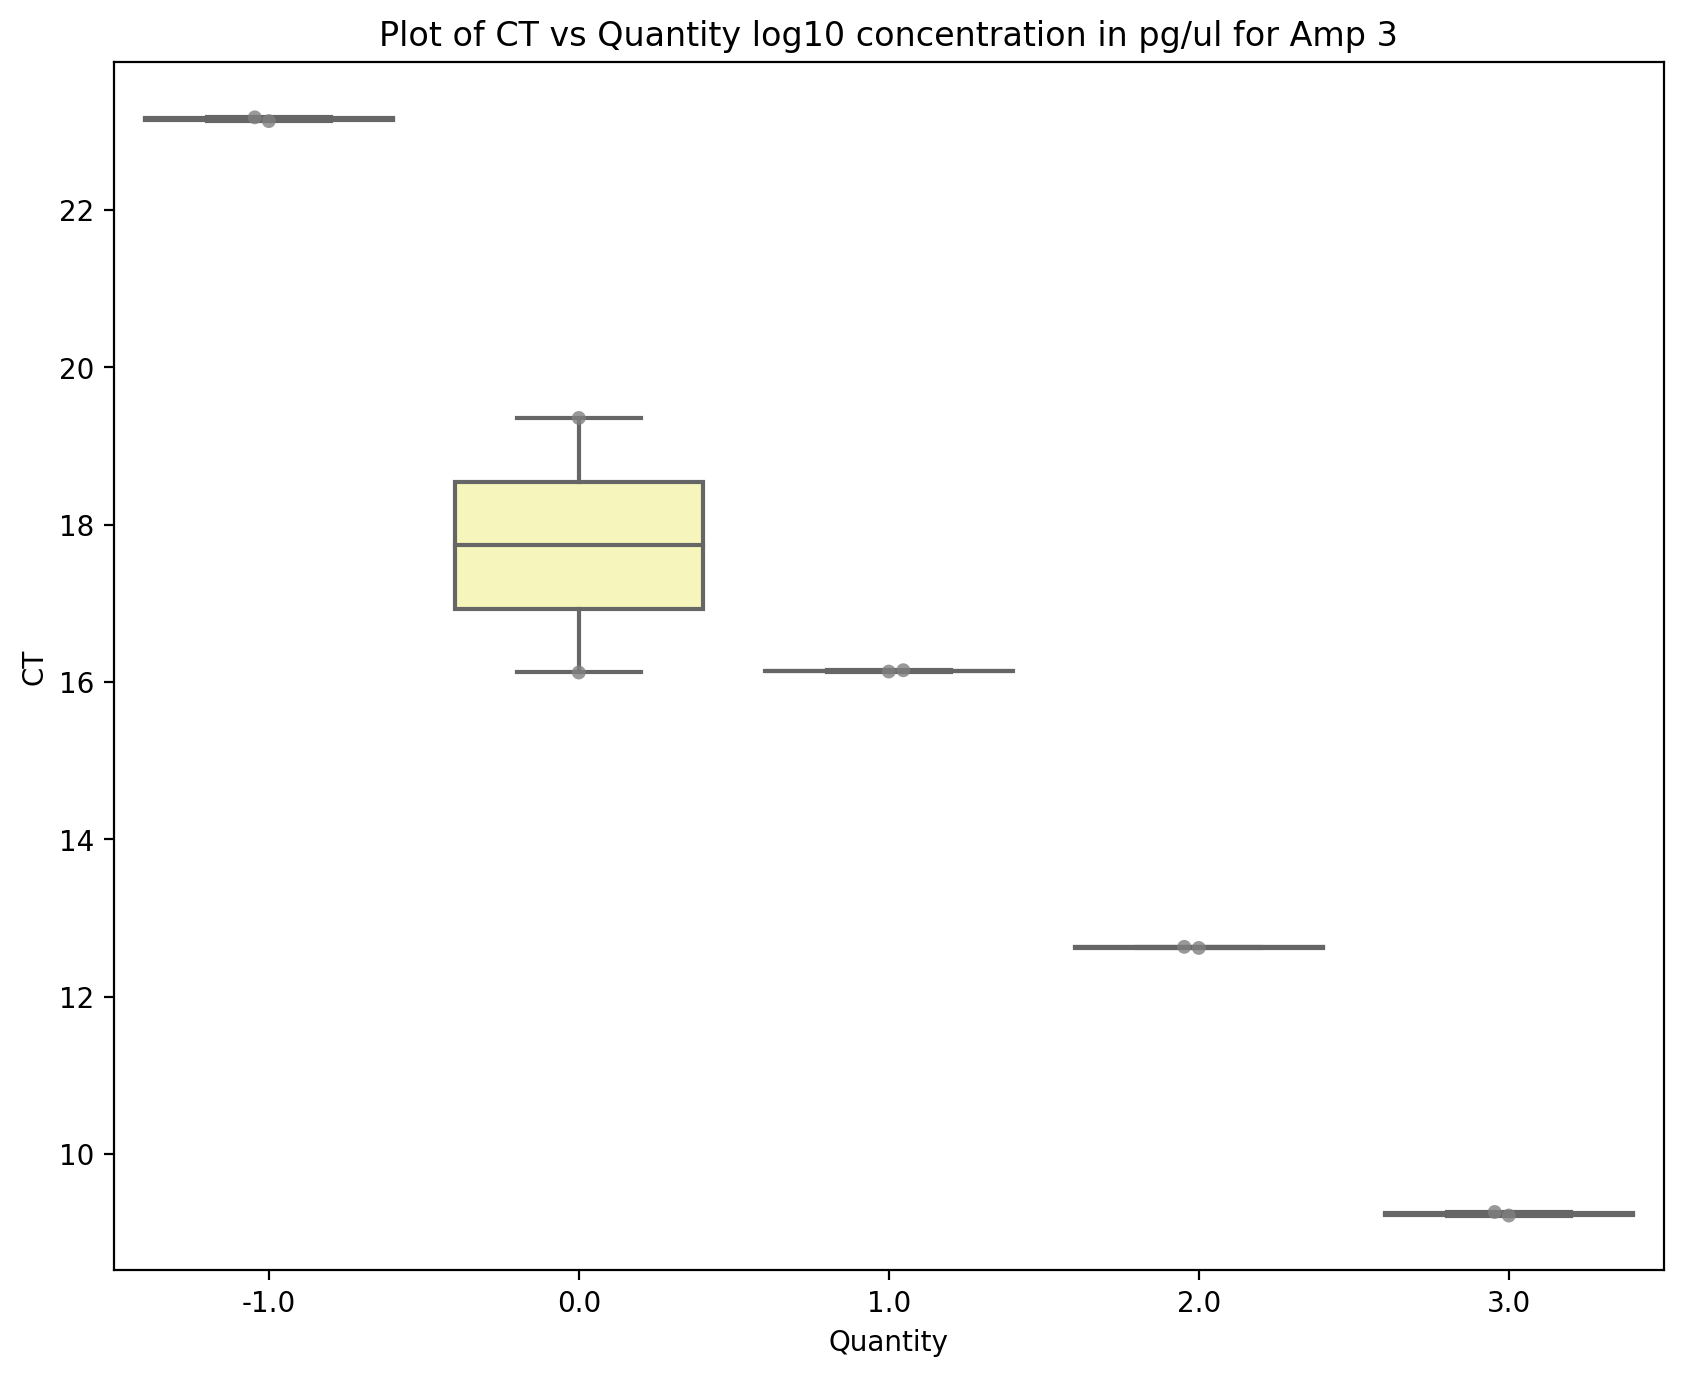

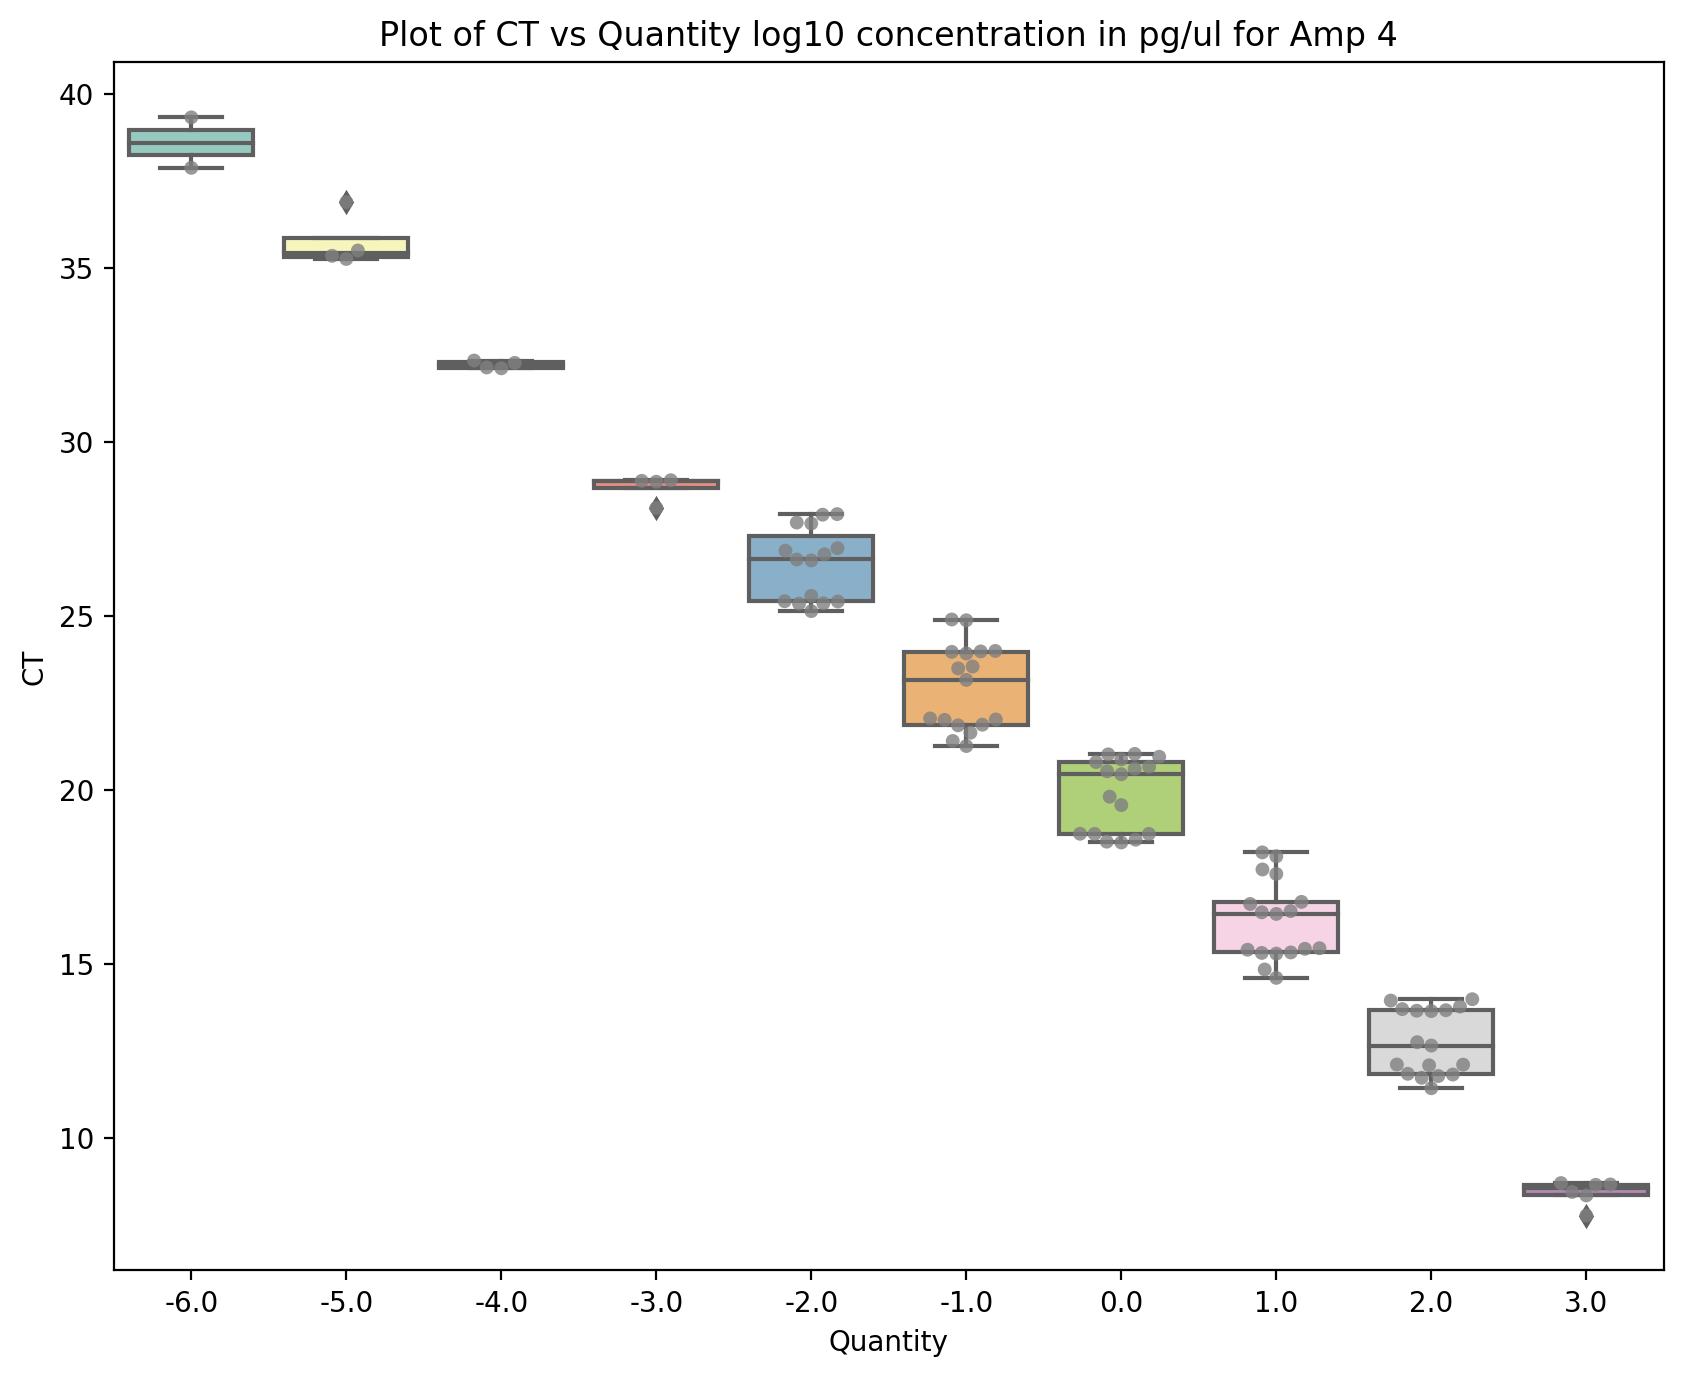

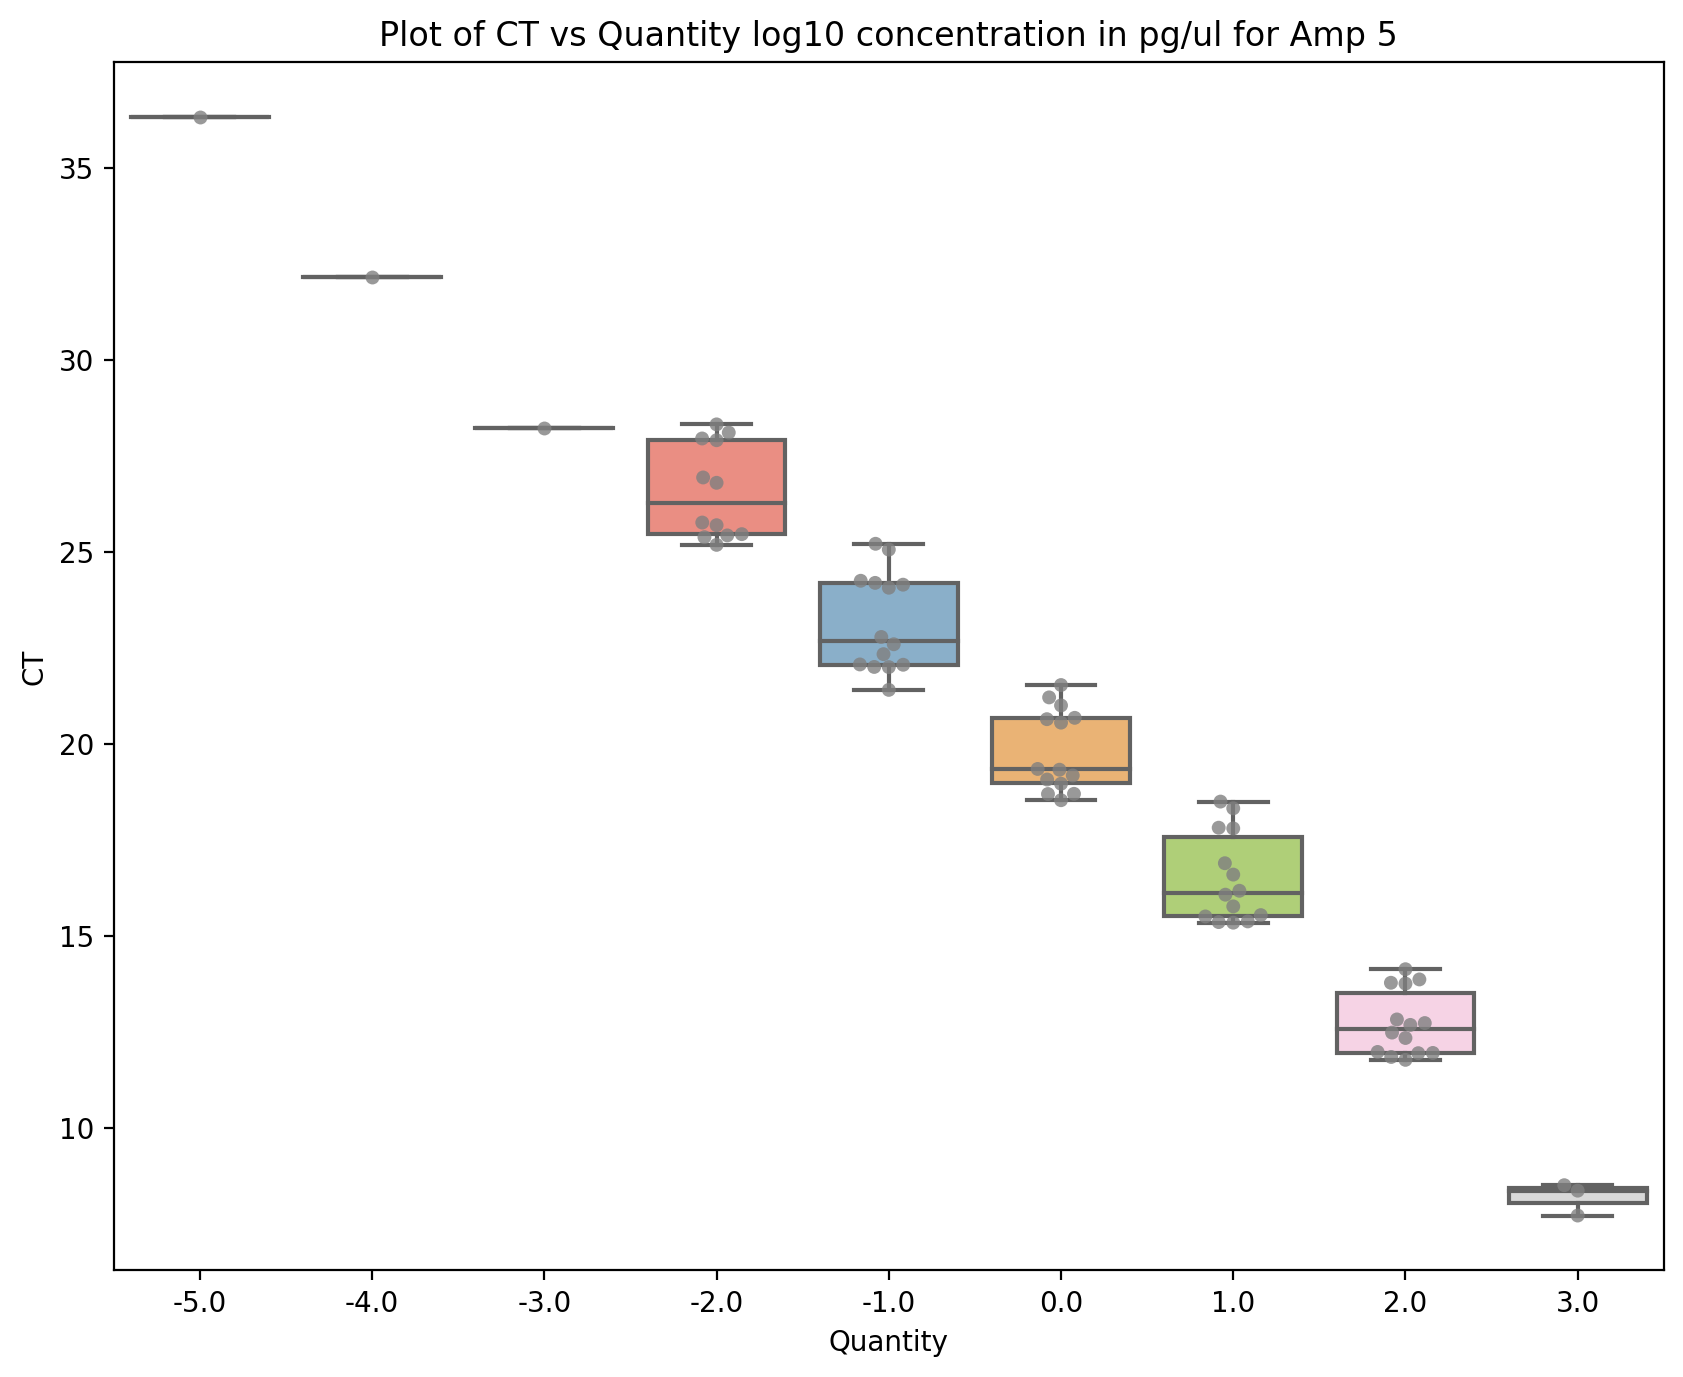

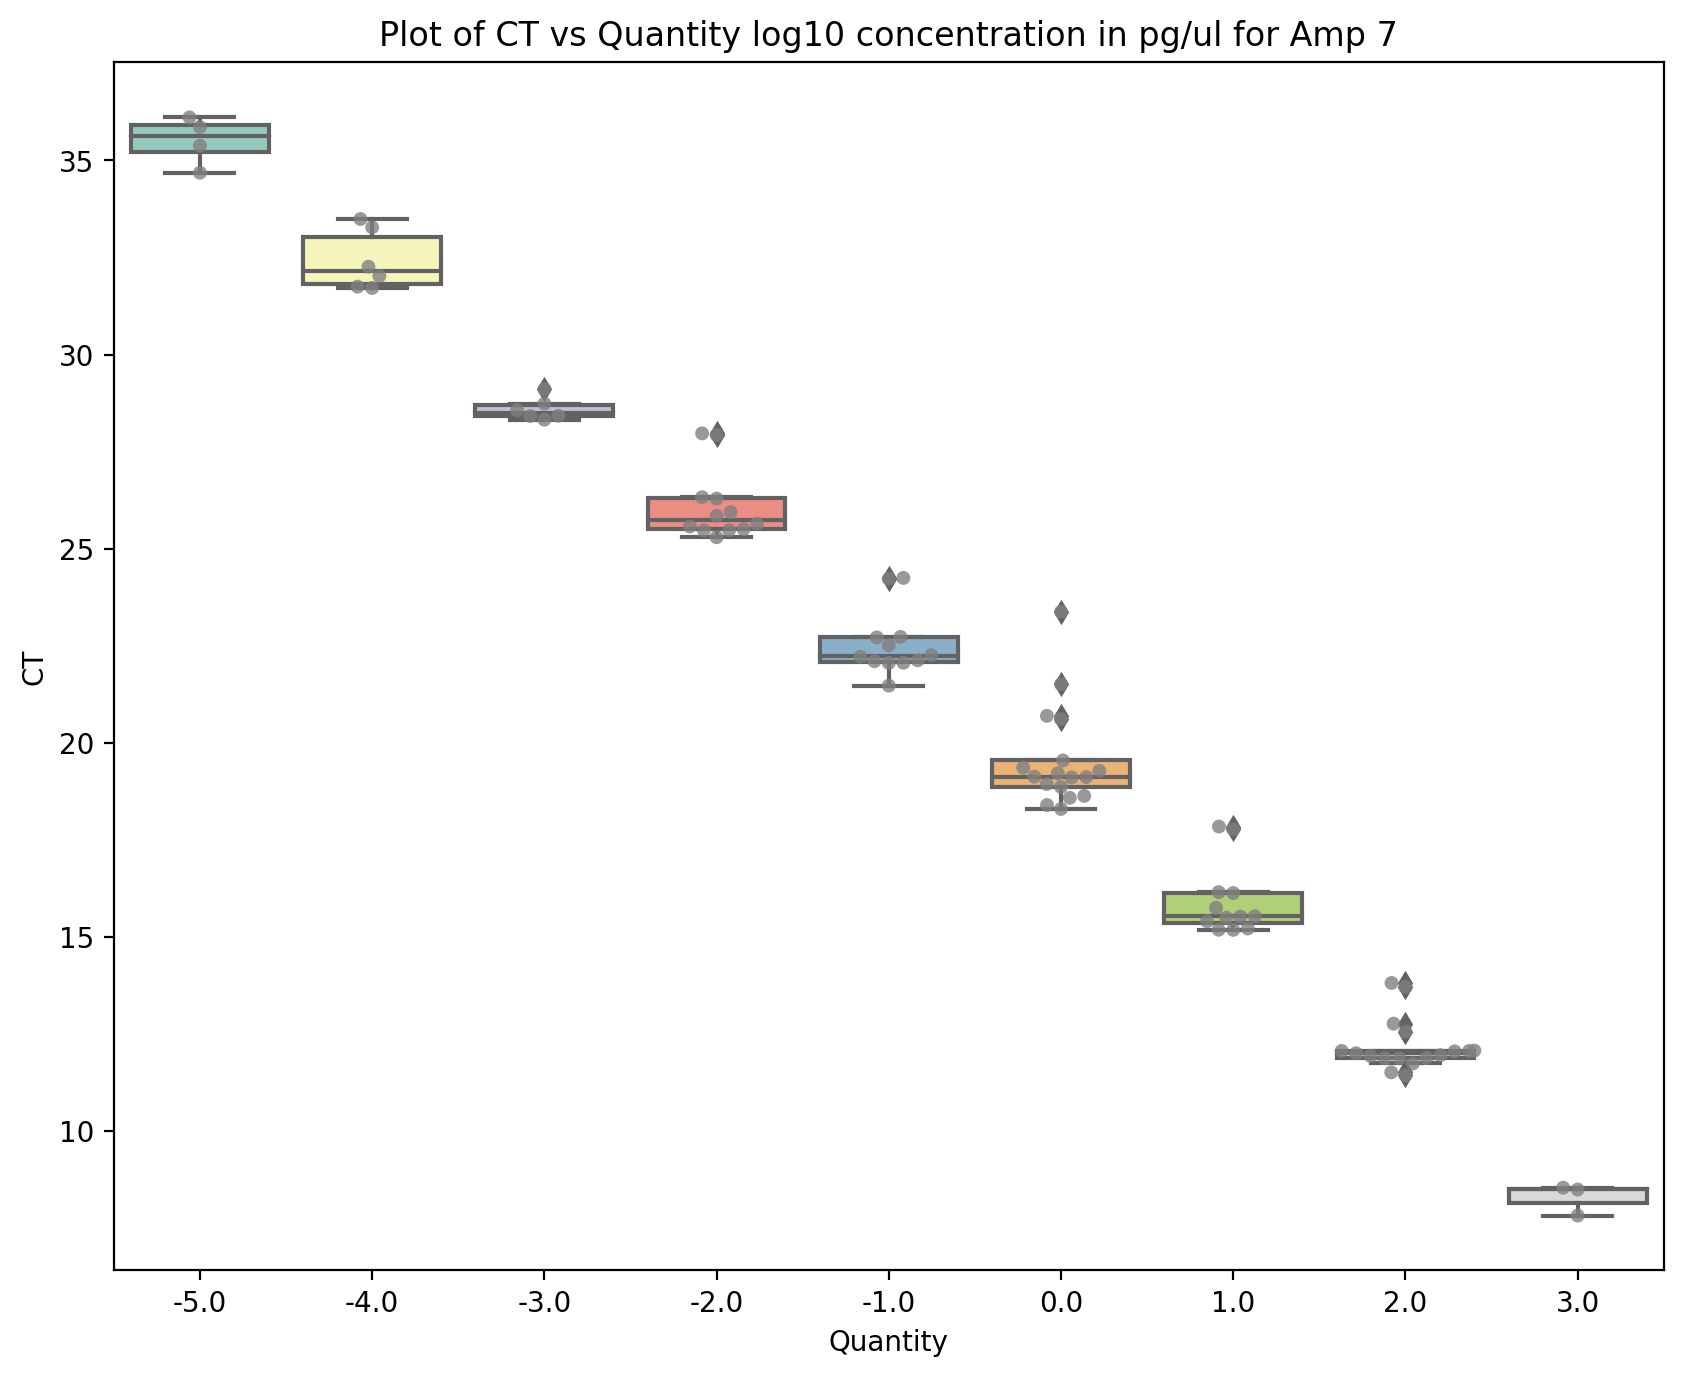

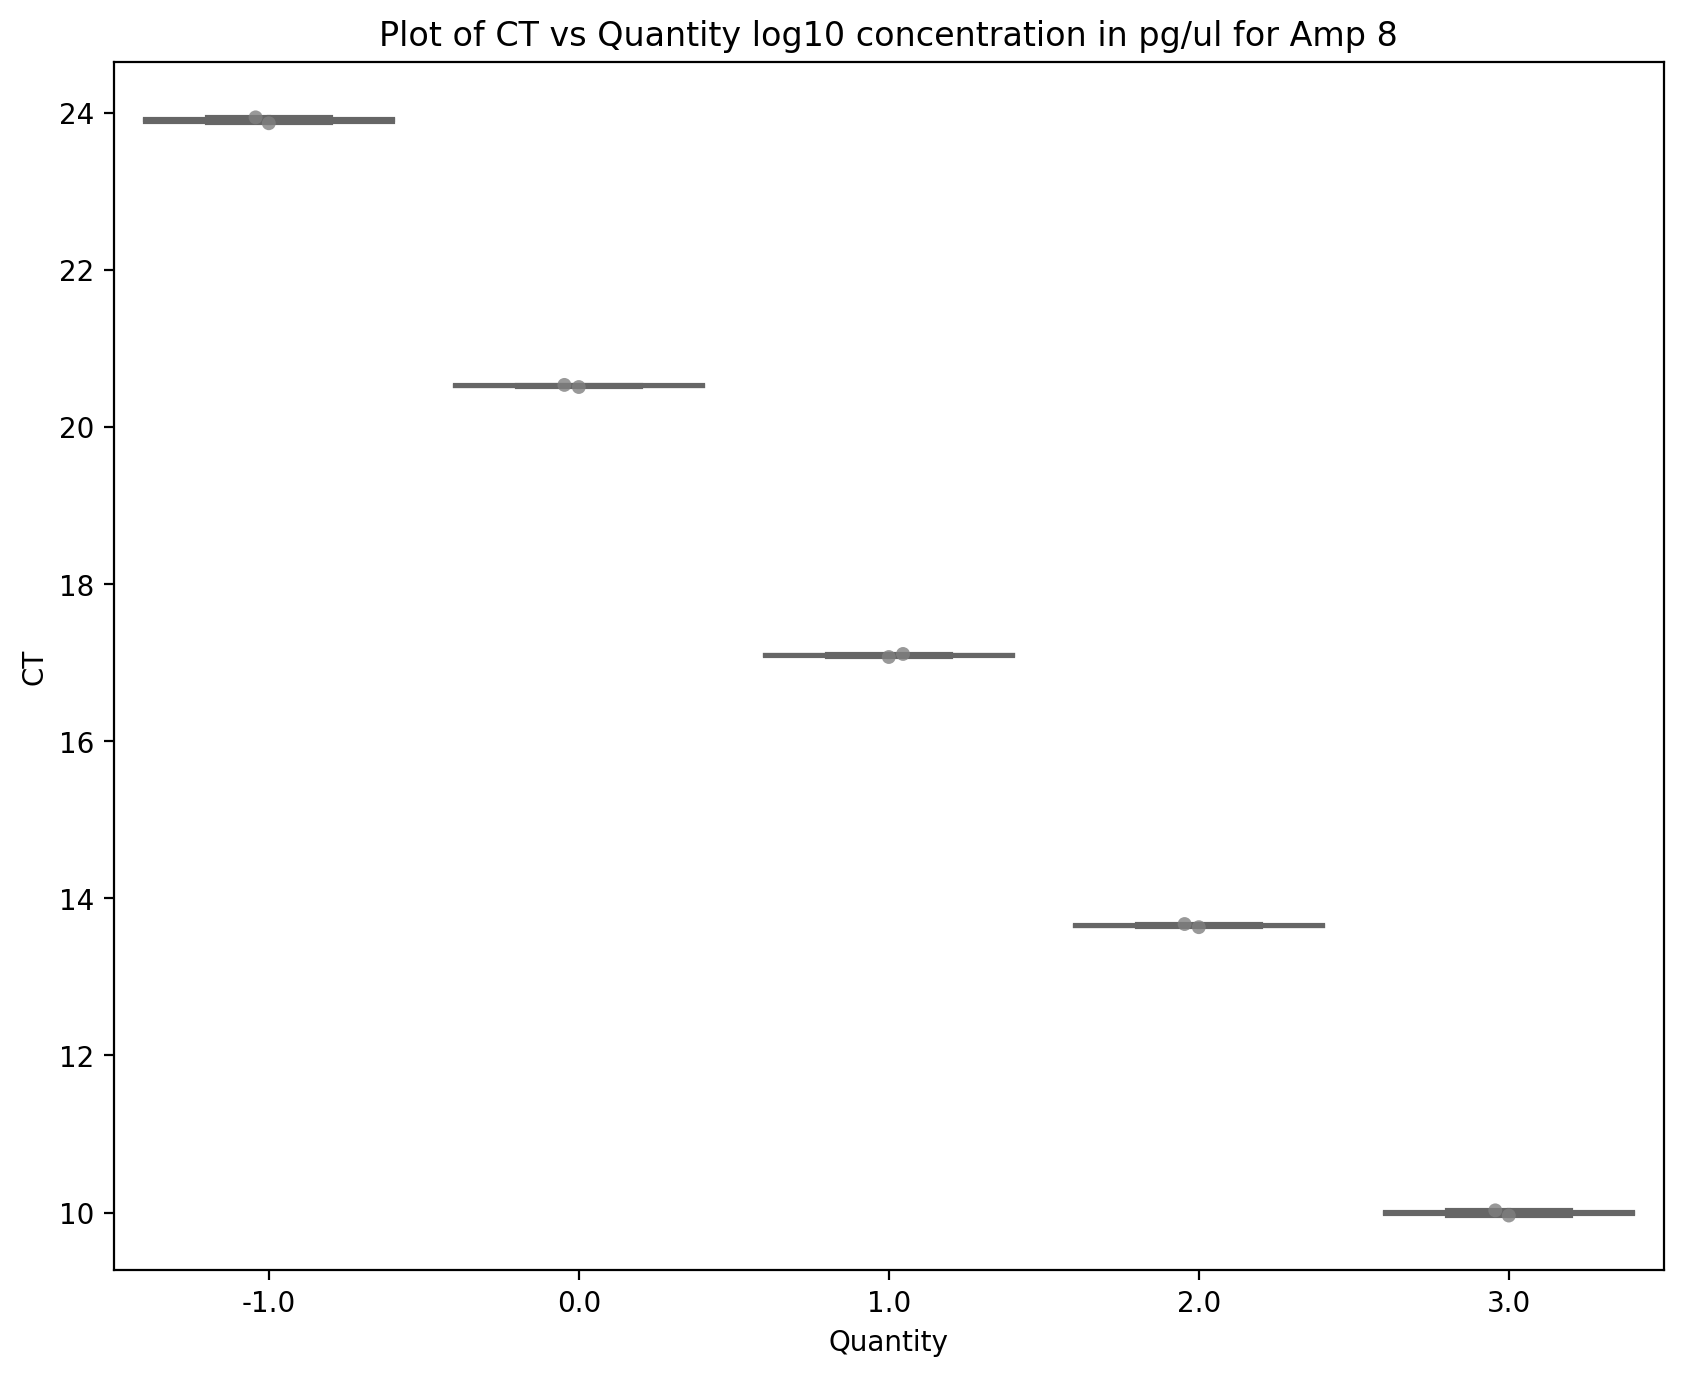

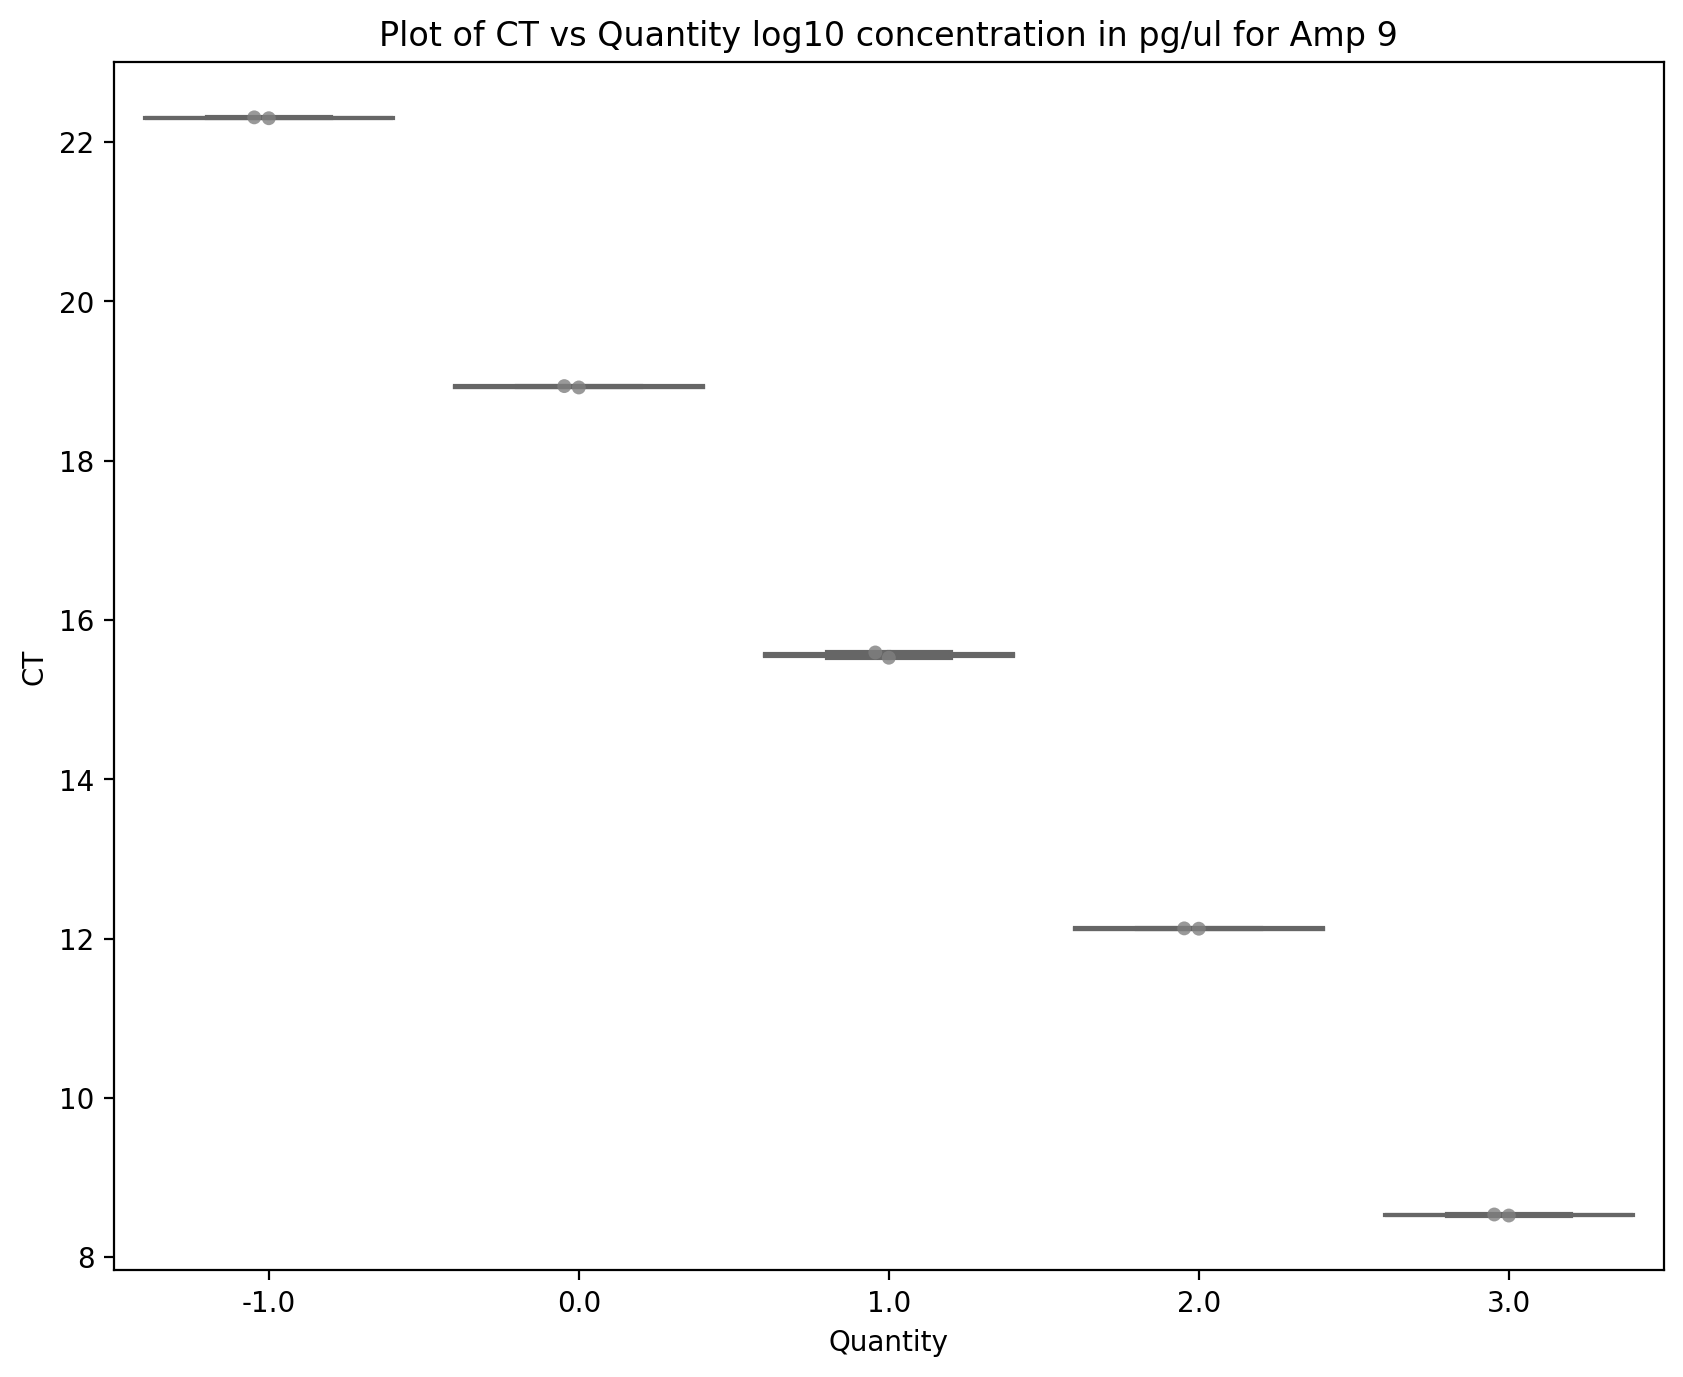

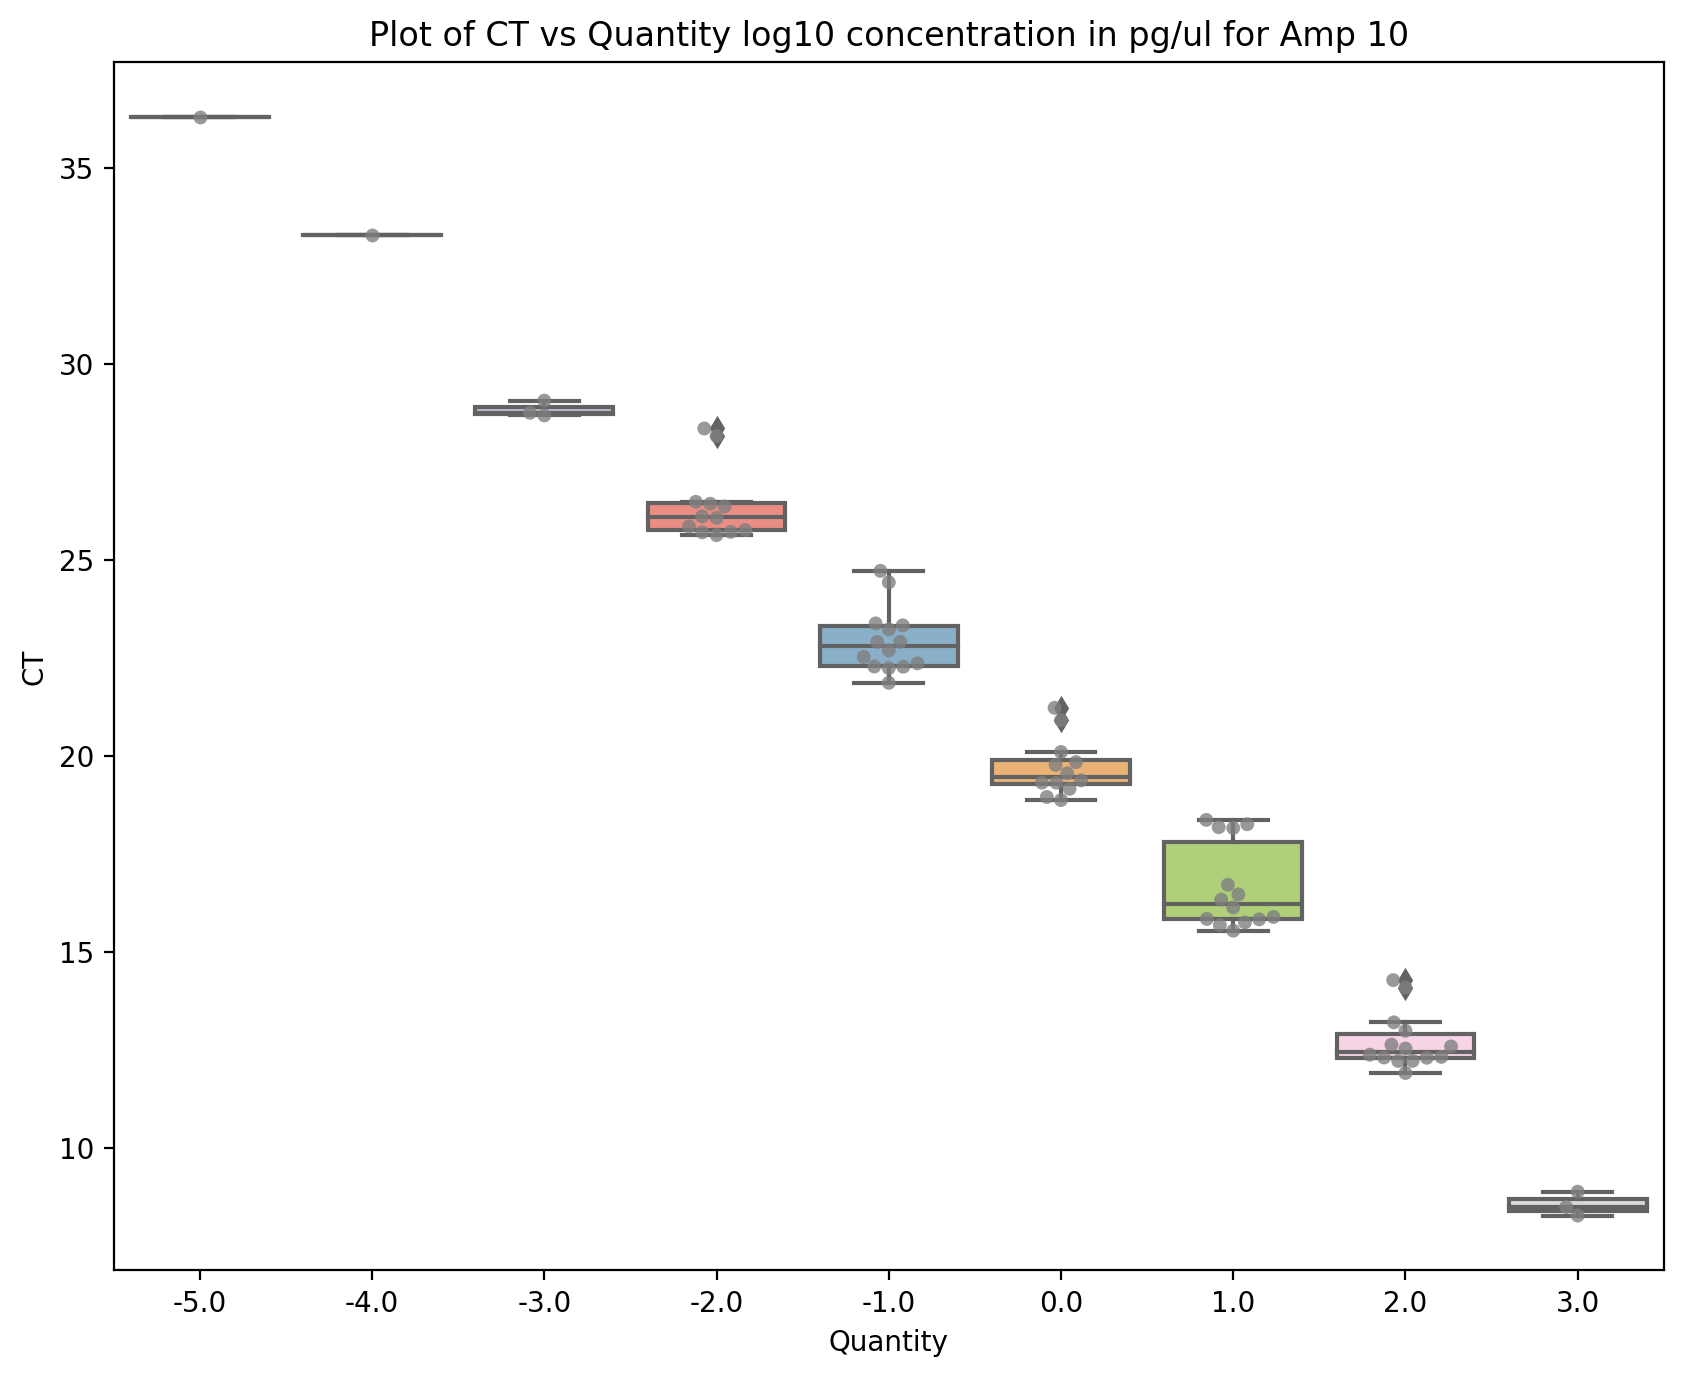

In [30]:
# auto plot all Ct against quantity for al the Amp
for n,i in enumerate(df['Amp'].unique()):
    #print(n)
    #print(i)
    plt.figure(figsize=(10,8),dpi=200)
    sns.boxplot(data=df[df['Amp']==i],
               x='Quantity',
               y='CT',
                palette='Set3'
                #hue=df['Quantity']
                #ax=ax # defining the axes of the plot to the ax value that we zipped
              )
    sns.swarmplot(data=df[df['Amp']==i],
               x='Quantity',
               y='CT',
                  color="grey",
                 alpha=0.8)

    plt.title('Plot of CT vs Quantity log10 concentration in pg/ul for Amp '+str(i))

In [31]:
df[df['Amp']==4].sort_values(by='Quantity')

,Run,Amp,Conc (fg/ul),CT,Conc (pg/ul),Quantity
135,3,4,0.001,37.882,0.000001,-6.0
137,3,4,0.001,39.332,0.000001,-6.0
132,3,4,0.010,35.263,0.000010,-5.0
133,3,4,0.010,35.506,0.000010,-5.0
134,3,4,0.010,35.353,0.000010,-5.0
...,...,...,...,...,...,...
24,1,4,1000000.000,8.350,1000.000000,3.0
25,1,4,1000000.000,8.450,1000.000000,3.0
108,3,4,1000000.000,8.665,1000.000000,3.0
109,3,4,1000000.000,8.654,1000.000000,3.0


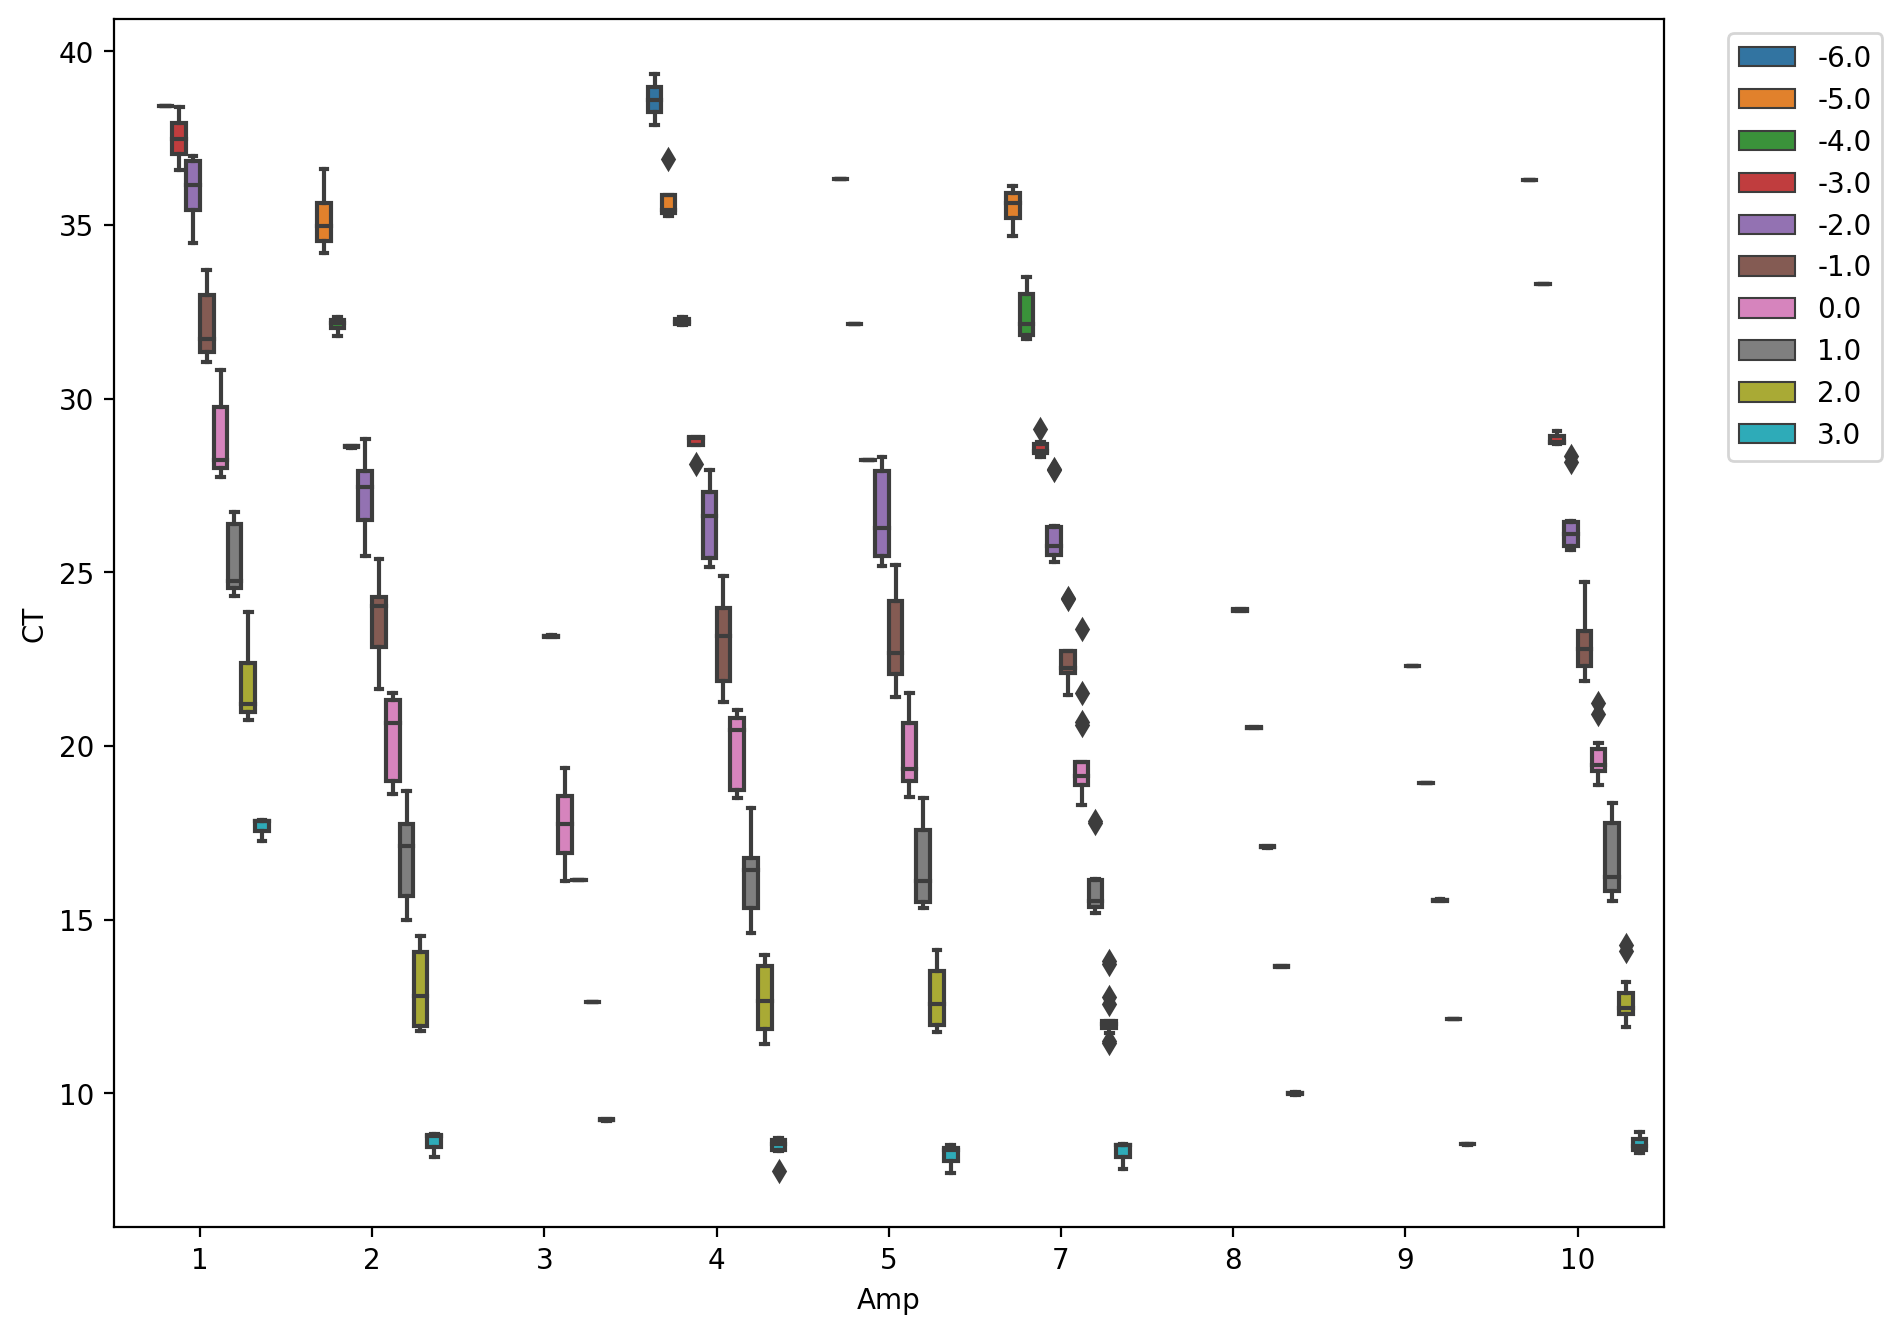

In [32]:
plt.figure(figsize=(10,8),dpi=200)
sns.boxplot(data=df,
           x='Amp',
           y='CT',
            hue=df['Quantity']
            #ax=ax # defining the axes of the plot to the ax value that we zipped,
          )
plt.legend(bbox_to_anchor=(1.15, 1))

In [33]:
df[df['CT']==0]

,Run,Amp,Conc (fg/ul),CT,Conc (pg/ul),Quantity


In [34]:
df[(df['Amp']==1) & (df['Quantity'] == 1)]

,Run,Amp,Conc (fg/ul),CT,Conc (pg/ul),Quantity
146,2,1,10000.0,24.571,10.0,1.0
147,2,1,10000.0,24.798,10.0,1.0
148,5,1,10000.0,24.715,10.0,1.0
149,6,1,10000.0,26.741,10.0,1.0
150,6,1,10000.0,26.385,10.0,1.0
151,6,1,10000.0,26.439,10.0,1.0
152,8,1,10000.0,24.304,10.0,1.0
153,8,1,10000.0,24.516,10.0,1.0


In [35]:
np.mean(df[(df['Amp']==1) & (df['Quantity'] == 1)])['CT']

25.308625

In [36]:
stats.sem((df[(df['Amp']==1) & (df['Quantity'] == 1)])['CT'])

0.3606238115850685

In [37]:
len((df[(df['Amp']==1) & (df['Quantity'] == 1)])['CT'])

8

In [38]:
df[df['Amp']==1]['Quantity'].unique()

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.])

In [39]:
amps

Int64Index([1, 2, 3, 4, 5, 7, 8, 9, 10], dtype='int64', name='Amp')

In [40]:
df

,Run,Amp,Conc (fg/ul),CT,Conc (pg/ul),Quantity
270,4,1,0.1,38.431,0.0001,-4.0
271,4,1,0.1,38.414,0.0001,-4.0
266,4,1,1.0,36.570,0.0010,-3.0
268,5,1,1.0,38.394,0.0010,-3.0
259,5,1,10.0,35.767,0.0100,-2.0
...,...,...,...,...,...,...
605,11,10,100000.0,12.293,100.0000,2.0
606,11,10,100000.0,12.211,100.0000,2.0
96,2,10,1000000.0,8.483,1000.0000,3.0
97,2,10,1000000.0,8.874,1000.0000,3.0


In [41]:
df[(df['Amp']==10)&(df['Quantity']==-3)]

,Run,Amp,Conc (fg/ul),CT,Conc (pg/ul),Quantity
254,5,10,1.0,28.686,0.001,-3.0
613,11,10,1.0,29.063,0.001,-3.0
614,11,10,1.0,28.753,0.001,-3.0


In [28]:
for amp in amps:
    print('Amp'+str(amp)+'\n'+'\n')
    print(df[df['Amp']==amp]['Quantity'].unique())

    for qty in (df[df['Amp']==amp]['Quantity'].unique()):
        print('Quantity equals to: '+str(qty))
        print('length of data equals: '+str(len((df[(df['Amp']==amp) & (df['Quantity'] == qty)])['CT'])))
        if len((df[(df['Amp']==amp) & (df['Quantity'] == qty)])['CT']) <2:
            pass
        else:
            print(np.mean(df[(df['Amp']==amp) & (df['Quantity'] == qty)])['CT'])
            print(stats.sem((df[(df['Amp']==amp) & (df['Quantity'] == qty)])['CT']))

Amp1


[-4. -3. -2. -1.  0.  1.  2.  3.]
Quantity equals to: -4.0
length of data equals: 2
38.4225
0.008499999999997954
Quantity equals to: -3.0
length of data equals: 2
37.482
0.911999999999999
Quantity equals to: -2.0
length of data equals: 6
36.001333333333335
0.40972264331428465
Quantity equals to: -1.0
length of data equals: 8
32.091625
0.3505477824318064
Quantity equals to: 0.0
length of data equals: 11
28.901181818181826
0.3591405857468333
Quantity equals to: 1.0
length of data equals: 8
25.308625
0.3606238115850685
Quantity equals to: 2.0
length of data equals: 11
21.75372727272727
0.3636708824525297
Quantity equals to: 3.0
length of data equals: 3
17.650666666666666
0.19204195143538644
Amp2


[-5. -4. -3. -2. -1.  0.  1.  2.  3.]
Quantity equals to: -5.0
length of data equals: 4
35.191
0.5256312078507763
Quantity equals to: -4.0
length of data equals: 4
32.1215
0.11791628386274693
Quantity equals to: -3.0
length of data equals: 4
28.619750000000003
0.012892989050901601
Quantit

In [29]:
df[(df['Amp']==10) & (df['Quantity'] == -3)].iloc[0]['CT']

28.686

In [30]:
df[(df['Amp']==10) & (df['Quantity'] == -3)].iloc[0]['CT'],df[(df['Amp']==10) & (df['Quantity'] == -3)].iloc[0]['CT']

(28.686, 28.686)

In [31]:
ci95_list = []


for amp in amps:
    print('Amp'+str(amp))
    print(df[df['Amp']==amp]['Quantity'].unique())

    for qty in (df[df['Amp']==amp]['Quantity'].unique()):
        print(qty)
        if len((df[(df['Amp']==amp) & (df['Quantity'] == qty)])['CT']) >1:
                    #print(np.mean(df[(df['Amp']==amp) & (df['Quantity'] == qty)]))
            ci95 = stats.t.interval(alpha=0.95, df=(len((df[(df['Amp']==amp) & (df['Quantity'] == qty)])['CT'])-1),

                            # loc is the mean; what we are doing here to t get the mean of each Amp and each Quantity where 
                            # Amp is 1,4,5,9 and 10 and Quantity is from -1 to 3
                            # note that we pass in the raw values that we want to calculate the mean for and not the actual mean value
                            loc=np.mean(df[(df['Amp']==amp) & (df['Quantity'] == qty)])['CT'].round(decimals=3),

                            # scale is the SD the values passed in is the same as loc
                            scale=stats.sem((df[(df['Amp']==amp) & (df['Quantity'] == qty)])['CT']).round(decimals=3)
                           )
            ci95_list.append(
                ci95                
            )
        else:
            ci95 = (df[(df['Amp']==amp) & (df['Quantity'] == qty)].iloc[0]['CT'],df[(df['Amp']==amp) & (df['Quantity'] == qty)].iloc[0]['CT'])
            ci95_list.append(ci95)


Amp1
[-4. -3. -2. -1.  0.  1.  2.  3.]
-4.0
-3.0
-2.0
-1.0
0.0
1.0
2.0
3.0
Amp2
[-5. -4. -3. -2. -1.  0.  1.  2.  3.]
-5.0
-4.0
-3.0
-2.0
-1.0
0.0
1.0
2.0
3.0
Amp3
[-1.  0.  1.  2.  3.]
-1.0
0.0
1.0
2.0
3.0
Amp4
[-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.]
-6.0
-5.0
-4.0
-3.0
-2.0
-1.0
0.0
1.0
2.0
3.0
Amp5
[-5. -4. -3. -2. -1.  0.  1.  2.  3.]
-5.0
-4.0
-3.0
-2.0
-1.0
0.0
1.0
2.0
3.0
Amp7
[-5. -4. -3. -2. -1.  0.  1.  2.  3.]
-5.0
-4.0
-3.0
-2.0
-1.0
0.0
1.0
2.0
3.0
Amp8
[-1.  0.  1.  2.  3.]
-1.0
0.0
1.0
2.0
3.0
Amp9
[-1.  0.  1.  2.  3.]
-1.0
0.0
1.0
2.0
3.0
Amp10
[-5. -4. -3. -2. -1.  0.  1.  2.  3.]
-5.0
-4.0
-3.0
-2.0
-1.0
0.0
1.0
2.0
3.0


In [32]:
len(ci95_list)

69

In [33]:
df_grp['CI_lower','CI_upper'] = ci95_list

In [34]:
df.head(50)

,Run,Amp,Conc (fg/ul),CT,Conc (pg/ul),Quantity
270,4,1,0.1,38.431,0.0001,-4.0
271,4,1,0.1,38.414,0.0001,-4.0
266,4,1,1.0,36.570,0.0010,-3.0
268,5,1,1.0,38.394,0.0010,-3.0
259,5,1,10.0,35.767,0.0100,-2.0
260,6,1,10.0,36.963,0.0100,-2.0
261,6,1,10.0,36.993,0.0100,-2.0
262,6,1,10.0,36.507,0.0100,-2.0
263,8,1,10.0,34.475,0.0100,-2.0
264,8,1,10.0,35.303,0.0100,-2.0


In [35]:
df_grp

CT                  \
                   mean       std count   
Amp Quantity                              
1   -4.0      38.422500  0.012021     2   
    -3.0      37.482000  1.289763     2   
    -2.0      36.001333  1.003611     6   
    -1.0      32.091625  0.991499     8   
     0.0      28.901182  1.191135    11   
...                 ...       ...   ...   
10  -1.0      22.936286  0.827980    14   
     0.0      19.696500  0.734493    12   
     1.0      16.649000  1.089855    14   
     2.0      12.705571  0.704633    14   
     3.0       8.541000  0.308122     3   

                                              CI_lower  
                                              CI_upper  
Amp Quantity                                            
1   -4.0        (38.32035036210854, 38.52364963789145)  
    -3.0        (25.89394128037393, 49.07005871962607)  
    -2.0        (34.94706144698795, 37.05493855301204)  
    -1.0       (31.262016887895385, 32.92198311210461)  
     0.0      (28.101098152144587, 29.700901847855413)  
...                                                ...  
10  -1.0      (22.458558526922115, 23.413441473077885)  
     0.0      (19.229391146062415, 20.162608853937588)  
     1.0      (16.020332720969847, 17.277667279030155)  
     2.0       (12.299850692585329, 13.11214930741467)  
     3.0        (7.775127814075794, 9.306872185924208)  

[69 rows x 4 columns]

In [36]:
df_grp.head(50)

CT                  \
                   mean       std count   
Amp Quantity                              
1   -4.0      38.422500  0.012021     2   
    -3.0      37.482000  1.289763     2   
    -2.0      36.001333  1.003611     6   
    -1.0      32.091625  0.991499     8   
     0.0      28.901182  1.191135    11   
     1.0      25.308625  1.019998     8   
     2.0      21.753727  1.206160    11   
     3.0      17.650667  0.332626     3   
2   -5.0      35.191000  1.051262     4   
    -4.0      32.121500  0.235833     4   
    -3.0      28.619750  0.025786     4   
    -2.0      27.162500  1.057735    12   
    -1.0      23.634929  1.225351    14   
     0.0      20.213471  1.160690    17   
     1.0      16.835714  1.232722    14   
     2.0      13.077235  1.069243    17   
     3.0       8.585333  0.373022     3   
3   -1.0      23.157000  0.033941     2   
     0.0      17.739500  2.288905     2   
     1.0      16.141500  0.012021     2   
     2.0      12.625000  0.009899     2   
     3.0       9.237500  0.031820     2   
4   -6.0      38.607000  1.025305     2   
    -5.0      35.754500  0.767583     4   
    -4.0      32.220500  0.106347     4   
    -3.0      28.689500  0.388733     4   
    -2.0      26.487200  1.029904    15   
    -1.0      22.943118  1.228822    17   
     0.0      19.892176  1.033192    17   
     1.0      16.251176  1.150332    17   
     2.0      12.749059  0.937955    17   
     3.0       8.432667  0.352349     6   
5   -5.0      36.313000       NaN     1   
    -4.0      32.144000       NaN     1   
    -3.0      28.217000       NaN     1   
    -2.0      26.576417  1.228168    12   
    -1.0      23.153857  1.275599    14   
     0.0      19.815286  1.058489    14   
     1.0      16.503714  1.161001    14   
     2.0      12.719643  0.837529    14   
     3.0       8.196333  0.421143     3   
7   -5.0      35.507000  0.627470     4   
    -4.0      32.419000  0.775955     6   
    -3.0      28.597000  0.289424     6   
    -2.0      26.105917  0.918684    12   
    -1.0      22.561417  0.851142    12   
     0.0      19.568882  1.303337    17   
     1.0      15.935083  0.933801    12   
     2.0      12.197882  0.668696    17   
     3.0       8.290667  0.401341     3   

                                              CI_lower  
                                              CI_upper  
Amp Quantity                                            
1   -4.0        (38.32035036210854, 38.52364963789145)  
    -3.0        (25.89394128037393, 49.07005871962607)  
    -2.0        (34.94706144698795, 37.05493855301204)  
    -1.0       (31.262016887895385, 32.92198311210461)  
     0.0      (28.101098152144587, 29.700901847855413)  
     1.0       (24.455370645385283, 26.16262935461472)  
     2.0       (20.942957457884763, 22.56504254211524)  
     3.0      (16.824890675857034, 18.477109324142965)  
2   -5.0        (33.51703324342048, 36.86496675657953)  
    -4.0       (31.745471335976458, 32.49652866402354)  
    -3.0      (28.578628198031307, 28.661371801968695)  
    -2.0      (26.491699526174703, 27.834300473825298)  
    -1.0       (22.92855944933725, 24.341440550662753)  
     0.0      (19.615186705619674, 20.810813294380328)  
     1.0       (16.125238712024327, 17.54676128797567)  
     2.0      (12.527944527501758, 13.626055472498242)  
     3.0        (7.659929663069077, 9.510070336930925)  
3   -1.0        (22.85205108632563, 23.46194891367437)  
     0.0      (-2.8313454682835655, 38.31134546828356)  
     1.0      (16.040350362108544, 16.243649637891455)  
     2.0      (12.536056566844975, 12.713943433155025)  
     3.0        (8.958463495798494, 9.517536504201505)  
4   -6.0       (29.39500156608673, 47.818998433913265)  
    -5.0       (34.532940618770844, 36.97705938122916)  
    -4.0       (32.051330345819935, 32.38866965418006)  
    -3.0      (28.072605416774856, 29.307394583225147)  
    -2.0        (25.916486741014097, 27.0575132589859)  
    -1.0       (22.311268220832

In [37]:
df[(df['Amp']==10) & (df['Quantity'] == -4)].iloc[0]['CT']

33.284

In [38]:
#df_grp.to_csv('compiled data with CI.csv',index=True)

In [39]:
dict_amp['Amp10'].index.get_level_values(1)

Float64Index([-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0], dtype='float64', name='Quantity')

In [40]:
dict_amp[amp]['CT']['mean']

KeyError: 10

In [42]:
reg_stat = {}
for amp in dict_amp:
    print(amp)
    for qty in dict_amp[amp]:
        #print(dict_amp[amp].index.get_level_values(1))
        result = stats.linregress(
            x = dict_amp[amp].index.get_level_values(1),
            y = dict_amp[amp]['CT']['mean']
        )
        (slope, intercept, r_value, p_value, std_err), intercept_stderr = result, result.intercept_stderr
        reg_stat[str(amp)] = (slope, intercept, r_value, p_value, std_err, intercept_stderr)

Amp1
Amp2
Amp3
Amp4
Amp5
Amp7
Amp8
Amp9
Amp10


In [43]:
reg_stat

{'Amp1': (-3.0870567279942276,
  28.15792902236652,
  -0.9876608312310189,
  4.653394747136858e-06,
  0.19983669851927519,
  0.4686586000629459),
 'Amp2': (-3.234542693744165,
  19.592283092125736,
  -0.995935203615594,
  1.4042851289587481e-08,
  0.1105669681527562,
  0.3061460720360625),
 'Amp3': (-3.29535,
  19.07545,
  -0.9884374521583013,
  0.0014899081787325818,
  0.2918599250211193,
  0.5055162188298217),
 'Amp4': (-3.2872106595365422,
  19.27187361853833,
  -0.9986776268153118,
  1.3356875158127825e-11,
  0.059828155666107725,
  0.1938653816680126),
 'Amp5': (-3.348790674603175,
  19.277792658730153,
  -0.9970851988735238,
  4.389721160461525e-09,
  0.09685219616342584,
  0.2681715879423785),
 'Amp7': (-3.356492565359478,
  18.997157216775598,
  -0.9990239481975576,
  9.556082536842385e-11,
  0.056092681626376935,
  0.1553136025775763),
 'Amp8': (-3.4698499999999997,
  20.50515,
  -0.9998912744553377,
  1.3608935708123016e-06,
  0.029543795174848824,
  0.051171354291246404),
 '

In [44]:
reg_stats = pd.DataFrame.from_dict(reg_stat, orient='index',columns=('slope', 'intercept', 'r_value', 'p_value', 'std_err','intercept_stderr'))

In [45]:
reg_stats = reg_stats.round(decimals=3)

In [46]:
reg_stats['pcr efficiency'] = ((10**(-1/reg_stats['slope']))-1)*100

In [47]:
reg_stats = reg_stats.round(decimals=3)

In [48]:
# this pcr efficiency is calculated based on the mean of the CT values across amps and runs
# see the other notebook 'compiled Lplasmid pcr eff' for the pcr eff calcualted
# based on the individual runs for each amp
reg_stats

,slope,intercept,r_value,p_value,std_err,intercept_stderr,pcr efficiency
Amp1,-3.087,28.158,-0.988,0.000,0.200,0.469,110.833
Amp2,-3.235,19.592,-0.996,0.000,0.111,0.306,103.760
Amp3,-3.295,19.075,-0.988,0.001,0.292,0.506,101.136
Amp4,-3.287,19.272,-0.999,0.000,0.060,0.194,101.479
Amp5,-3.349,19.278,-0.997,0.000,0.097,0.268,98.883
Amp7,-3.356,18.997,-0.999,0.000,0.056,0.155,98.598
Amp8,-3.470,20.505,-1.000,0.000,0.030,0.051,94.171
Amp9,-3.435,18.925,-1.000,0.000,0.027,0.046,95.488
Amp10,-3.397,19.417,-0.999,0.000,0.063,0.175,96.960


i value is 1
1
ax value is AxesSubplot(0.125,0.749828;0.352273x0.130172)
i value is 2
2
ax value is AxesSubplot(0.547727,0.749828;0.352273x0.130172)
i value is 3
3
ax value is AxesSubplot(0.125,0.593621;0.352273x0.130172)
i value is 4
4
ax value is AxesSubplot(0.547727,0.593621;0.352273x0.130172)
i value is 5
5
ax value is AxesSubplot(0.125,0.437414;0.352273x0.130172)
i value is 7
7
ax value is AxesSubplot(0.547727,0.437414;0.352273x0.130172)
i value is 8
8
ax value is AxesSubplot(0.125,0.281207;0.352273x0.130172)
i value is 9
9
ax value is AxesSubplot(0.547727,0.281207;0.352273x0.130172)
i value is 10
10
ax value is AxesSubplot(0.125,0.125;0.352273x0.130172)


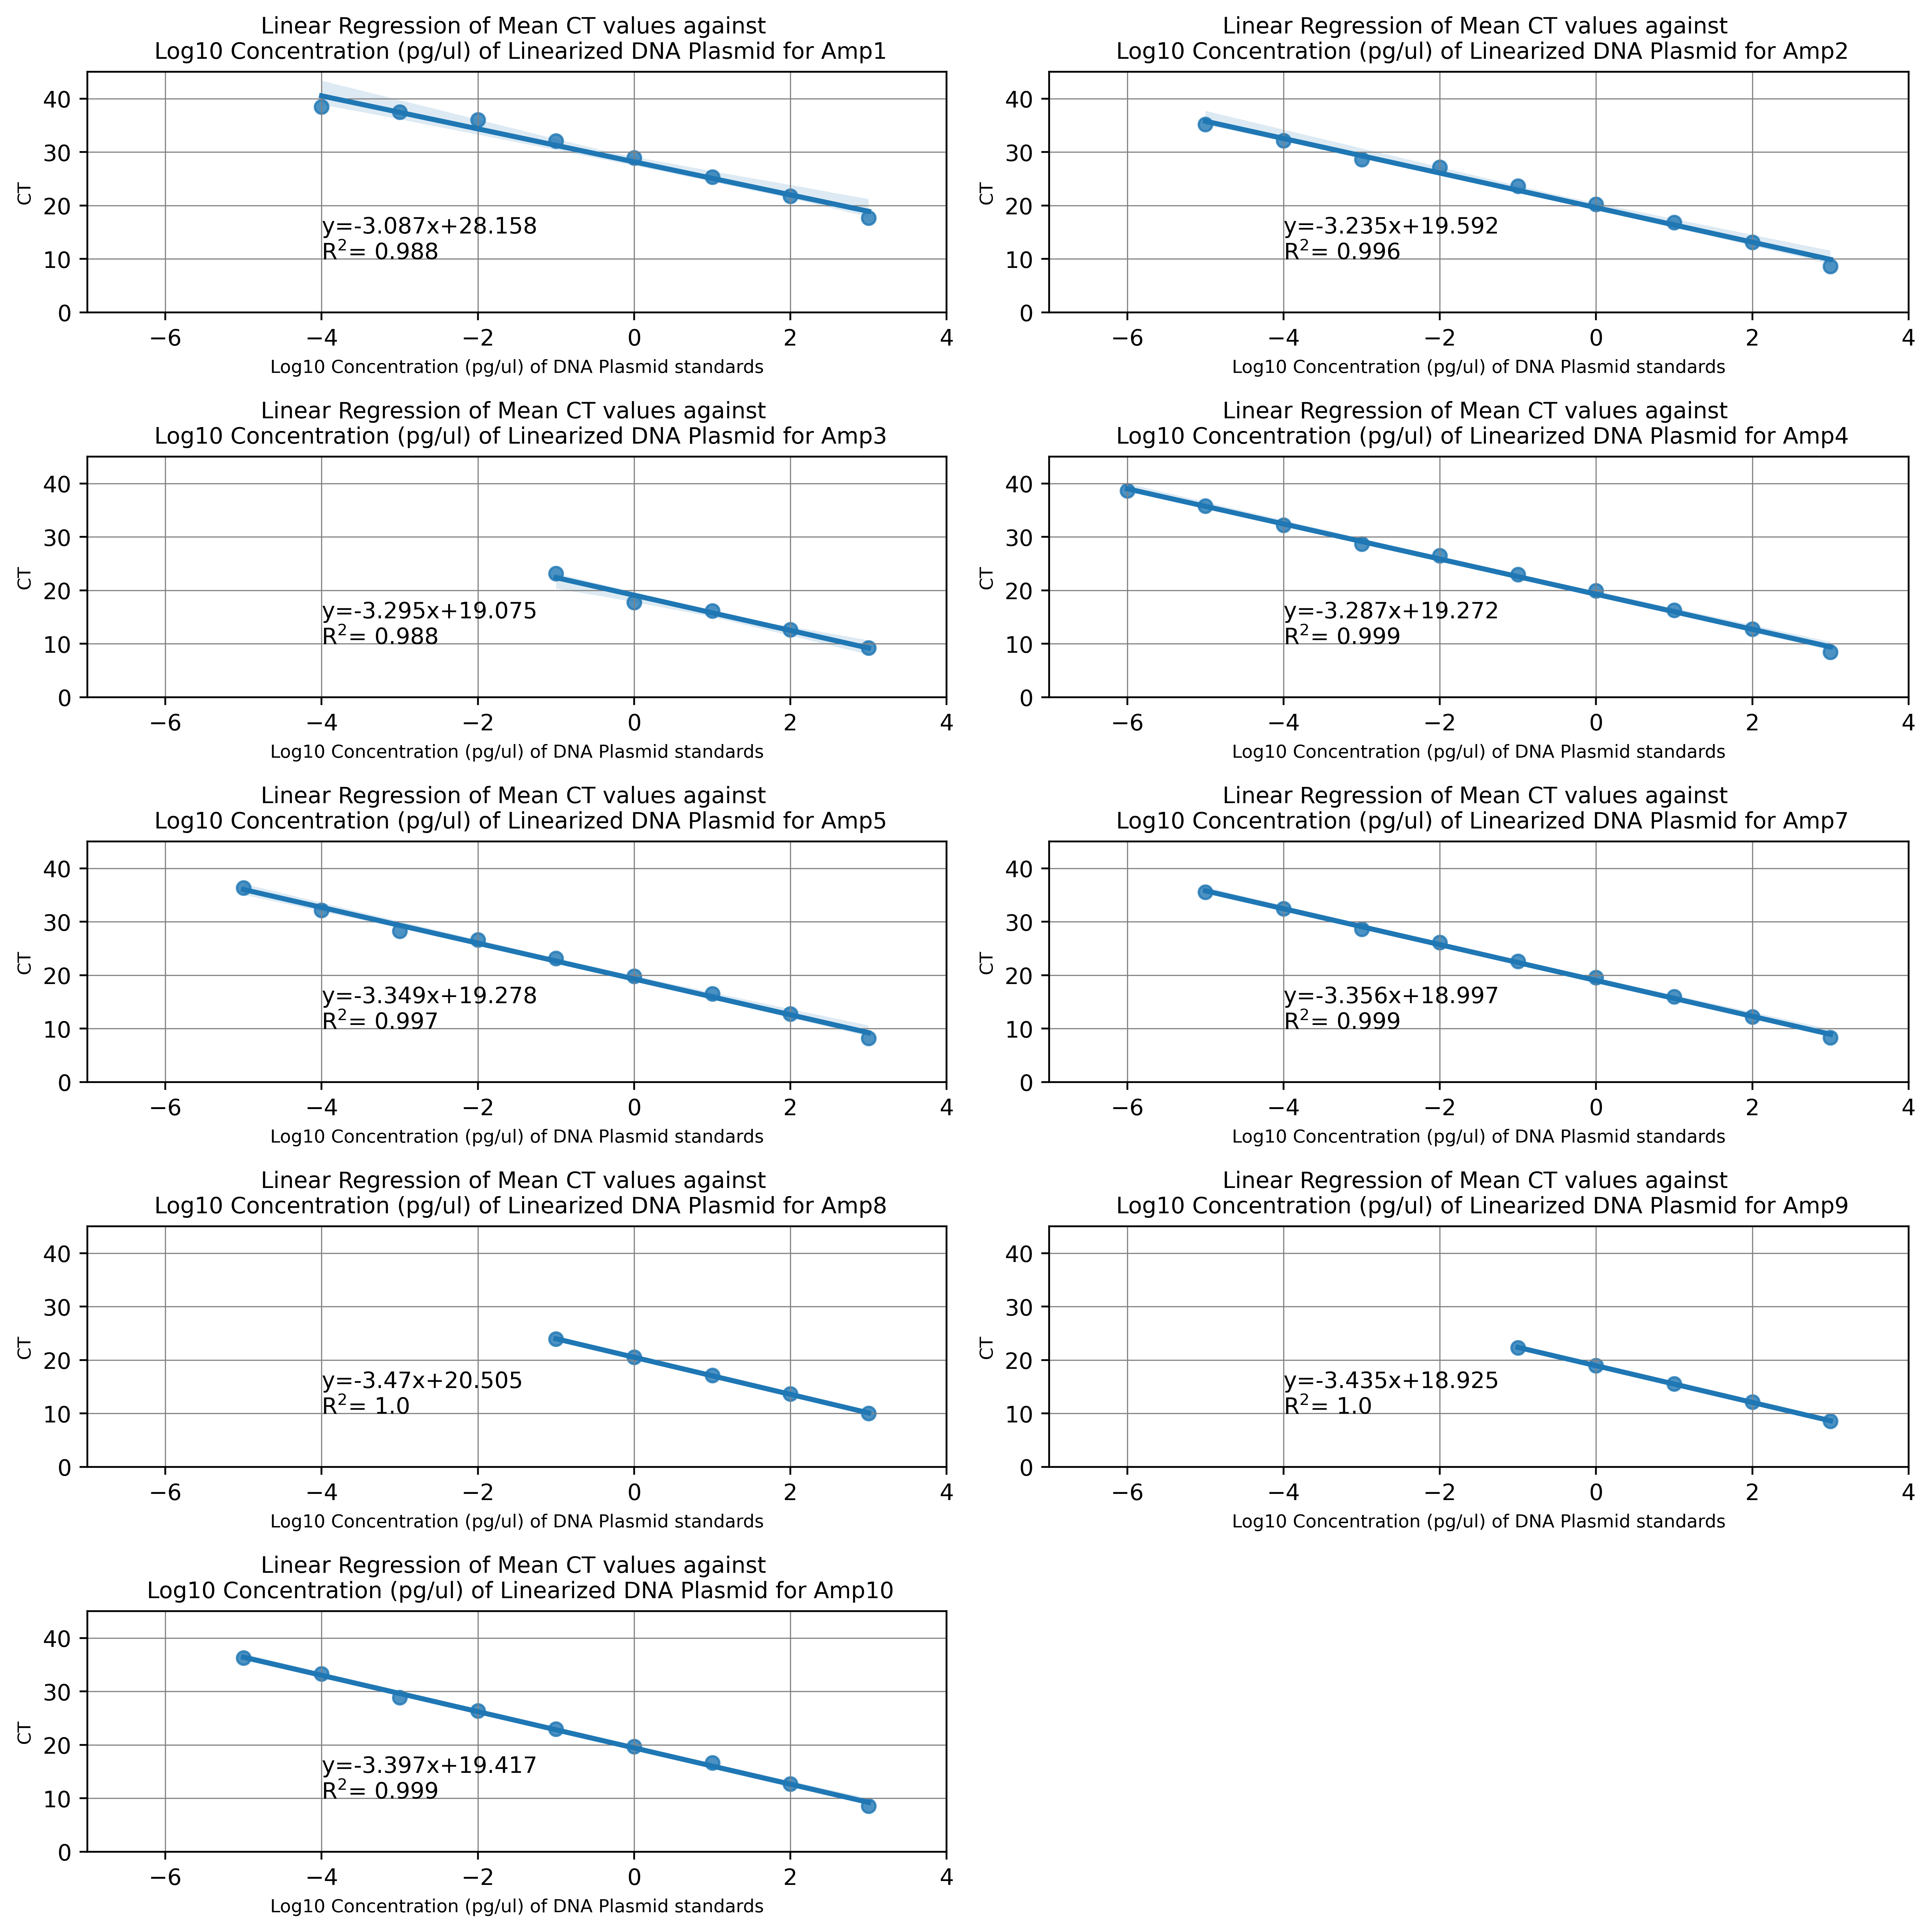

In [59]:
## plots with subplots with loop #

# defining a subplot object with 3 rows and 2 column; enabled tight_layout to ensure axes appear properly;
# note that there will be 1 axes that is not populated and has to be deleted
fig, axs = plt.subplots(nrows=5,ncols=2,figsize=(12,12),sharex=False,tight_layout=True,dpi=500)



# loop to create the plots
## here we are passing in 3 things to the for loop: the flattened array of the axs 'ax',
## the index 'n' and the Amplicon value 'i'. and we zip them up. note that since axs.revel() returns too many
## values, we have to define a 'sub-tuple' called (n,i)
for ax,(n,i) in zip(axs.ravel(),enumerate(amps)):
    print('i value is '+ str(i)) # check
    print(i) # check
    print('ax value is ' +str(ax)) # check
    
    # creating the plot
    sns.regplot(data=dict_amp['Amp'+str(i)],
           x=dict_amp['Amp'+str(i)].index.get_level_values(1),
           y=dict_amp['Amp'+str(i)]['CT']['mean'],
            ax=ax # defining the axes of the plot to the ax value that we zipped
          )
    # setting the title
    ax.set_title('Linear Regression of Mean CT values against \n Log10 Concentration (pg/ul) of Linearized DNA Plasmid for Amp'+str(i),
                size=10)

    # showing the grid line
    ax.grid(which='major',
         axis='both',
        color='grey',
         linestyle='-',
         linewidth=0.5)
    
    # showing the regresion statistics
    ax.annotate("y={}x+{}\nR$^2$= {}".format(reg_stats['slope'][n].round(decimals=3),
                                        reg_stats['intercept'][n].round(decimals=3),
                                         -1 * reg_stats['r_value'][n].round(decimals=3)
                                        ),
             xy=(-4,10)
            )
    
    # setting the axes limits
    plt.setp(ax,
             xlim = (-7,4),
             ylim= (0,45)
        )
    
    # setting the x label for all the graphs
    ax.set_xlabel('Log10 Concentration (pg/ul) of DNA Plasmid standards',
                 size = 8)
    ax.set_ylabel('CT',
                 size = 8)

# saving the plot
fig.delaxes(axs[4, 1]) # remvoes the last axes because there is an odd number of plots
plt.savefig('compiledPlots for lin plasmid Standards for amps 1 to 10.png')